# **Enhancing Asset Value Prediction Using Long Short-Term Memory Networks**
## Author: Cesare Bergossi
### June 13, 2024

## Table of Contents<a id='toc0_'></a>    
- [**Enhancing Asset Value Prediction Using Long Short-Term Memory Networks**](#toc1_)       
  - [Background and Significance](#toc1_2_)    
  - [Project Objectives](#toc1_3_)    
  - [Structure of the Notebook](#toc1_4_)    
  - [Import Libraries](#toc1_5_)    
- [Data Acquisition](#toc2_)    
  - [CRSP (Center for Research in Security Prices)](#toc2_1_)    
    - [Connect to WRDS Database](#toc2_1_1_)    
    - [Fetch Data](#toc2_1_2_)    
    - [Data Overview](#toc2_1_3_)    
    - [Definitions of Data Columns](#toc2_1_4_)    
    - [Adjusted Market Variables](#toc2_1_5_)    
    - [Handle Missing Data](#toc2_1_6_)    
    - [Transform Listing Exchange Codes to Names](#toc2_1_7_)    
    - [Transform Industry Codes to Descriptions](#toc2_1_8_)    
    - [Final Checks](#toc2_1_9_)    
  - [Compustat](#toc2_2_)    
    - [Fetch Data](#toc2_2_1_)    
    - [Data Overview](#toc2_2_2_)    
    - [Definitions of Data Columns](#toc2_2_3_)    
    - [Calculation of Preferred Stock Value](#toc2_2_4_)    
    - [Calculation of Book Equity Value](#toc2_2_5_)    
    - [Link Compustat Data with CRSP Identifiers](#toc2_2_6_)    
    - [Calculation of Book-to-Market Ratio](#toc2_2_7_)    
    - [Alignment Daily Data (CRSP) and Monthly Data (Compustat)](#toc2_2_8_)    
- [Exploratory Data Analysis (EDA)](#toc3_)    
  - [Summary Statistics](#toc3_1_)    
  - [Data Visualization](#toc3_2_)    
    - [Number of Securities by Exchange](#toc3_2_1_)    
    - [Number of Securities by Industry](#toc3_2_2_)    
  - [Distribution of Stock Prices](#toc3_3_)    
    - [Histogram of Stock Prices](#toc3_3_1_)    
    - [Box Plot of Stock Prices](#toc3_3_2_)    
  - [Price Trends Over Time](#toc3_4_)    
  - [Including Outliers in Predictive Modeling](#toc3_5_)    
- [Data Preprocessing](#toc4_)    
  - [Number of Days Variable](#toc4_1_)    
  - [Handle Missing Data](#toc4_2_)    
  - [One-Hot Encoding of Categorical Variables](#toc4_3_)    
  - [Useful Functions](#toc4_4_)    
- [Linear Regression](#toc5_)    
  - [Evaluation Metrics](#toc5_1_)    
  - [Random Train-Test Split](#toc5_2_)    
  - [Time-Based Train-Test Split](#toc5_3_)    
  - [Performance Analysis](#toc5_4_)    
  - [Linear Regression on High vs. Low Priced Stocks](#toc5_5_)    
    - [High-Priced Stocks](#toc5_5_1_)    
    - [Low-Priced Stocks](#toc5_5_2_)    
    - [Conclusions](#toc5_5_3_)    
- [Lasso Regression](#toc6_)    
- [Neural Networks](#toc7_)    
- [LSTM (Long Short-Term Memory) Networks](#toc8_)    
    - [Structure of LSTM Networks](#toc8_1_1_)    
  - [Single Layer, Single Asset, Price Only](#toc8_2_)    
    - [Data Preprocessing](#toc8_2_1_)    
    - [Normalization](#toc8_2_2_)    
    - [Creating Sequences](#toc8_2_3_)    
    - [Building the LSTM Model](#toc8_2_4_)    
    - [Training and Testing the Model](#toc8_2_5_)    
    - [Visualizing Predictions](#toc8_2_6_)    
    - [Performance Analysis](#toc8_2_7_)    
  - [Gradient Clipping](#toc8_3_)    
  - [Early Stopping](#toc8_4_)    
  - [Extension to Multiple Variables](#toc8_5_)    
    - [Normalization](#toc8_5_1_)    
    - [Creating Sequences](#toc8_5_2_)    
    - [Building the Multivariate LSTM Model](#toc8_5_3_)    
    - [Training and Testing the Model](#toc8_5_4_)    
  - [Exploring Model Depth and Hidden Layer Size](#toc8_6_)    
    - [2 Layers, 50 Hidden Units](#toc8_6_1_)    
    - [3 Layers, 50 Hidden Units](#toc8_6_2_)    
    - [1 Layer, 100 Hidden Units](#toc8_6_3_)    
    - [1 Layer, 150 Hidden Units](#toc8_6_4_)    
  - [Testing on Other Assets](#toc8_7_)    
    - [Highest Price and Lowest Trading Volume Stock (NVR)](#toc8_7_1_)    
    - [Lowest Price Stock (S)](#toc8_7_2_)    
    - [Highest Trading Volume Stock (BAC)](#toc8_7_3_)    
- [Summary of Findings](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_2_'></a>[Background and Significance](#toc0_)

Over the last decade, the application of machine learning in financial markets has shown significant potential to improve investment strategies. Traditional financial models, while robust, often fail to capture the intricate and dynamic patterns present in financial data. This limitation has led to the exploration of advanced computational techniques, particularly neural networks, to enhance the accuracy and reliability of asset price predictions. Neural networks, in fact, possess remarkable expressive power to learn the features of the data. This enables modern machine learning systems to model complex and time-dependent relationships in an end-to-end manner.

## <a id='toc1_3_'></a>[Project Objectives](#toc0_)
This thesis aims to evaluate the effectiveness of Long Short-Term Memory (LSTM) networks in predicting asset prices. LSTM networks, a type of recurrent neural network (RNN), are well-suited for time series data due to their ability to capture long-term dependencies. The primary goal is to determine if LSTM models can outperform traditional regression techniques and simpler neural network architectures in stock price forecasting.

A key innovation in this study is the use of multivariate LSTM networks for financial time series data. While LSTM models have been widely used in various fields, their application in financial markets for asset price prediction is less explored. This research systematically evaluates the performance of multivariate LSTMs by testing different model configurations, adjusting hyperparameters and including multiple variables in the training. 

## <a id='toc1_4_'></a>[Structure of the Notebook](#toc0_)

- **Data Acquisition and Preprocessing**: Collection and initial preparation of financial data from the CRSP and Compustat databases. This includes cleaning the data, handling missing values and transforming features to prepare them for further analysis.

- **Exploratory Data Analysis**: Preliminary data analysis to find trends, patterns or anomalies in the financial data. It includes analysis of distribution of stock prices, visualization of securities by exchange and industry, and identification of outliers.

- **Baseline Methods**: Implementation and evaluation of traditional regression models, specifically linear regression and Lasso regression. This provides a benchmark against which the performance of LSTM models can be measured.

- **Long Short-Term Memory (LSTM) Networks**: Design, training and validation of LSTM models using both single-variable and multi-variable approaches. It also explores enhancements like gradient clipping and early stopping, and analyzes the effect of varying model depth and hidden layer sizes, concluding with robustness tests on assets with extreme price and volume characteristics.

## <a id='toc1_5_'></a>[Import Libraries](#toc0_)

In [238]:
# Standard libraries
import pandas as pd
import numpy as np
import sqlite3
import wrds
from datetime import datetime

# Plotting and Visualization
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_line, labs, scale_x_datetime, scale_y_continuous, scale_linetype_manual
from mizani.formatters import comma_format, percent_format

# Statistical and Scientific Libraries
from scipy import stats
from pandas.tseries.offsets import *

# Machine Learning Libraries - Scikit-learn
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Deep Learning Libraries - PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

# Inline plotting for Jupyter Notebooks
%matplotlib inline

# <a id='toc2_'></a>[Data Acquisition](#toc0_)

## <a id='toc2_1_'></a>[CRSP (Center for Research in Security Prices)](#toc0_)

### <a id='toc2_1_1_'></a>[Connect to WRDS Database](#toc0_)

In [239]:
try:
    conn = wrds.Connection()
    print("Connected to WRDS successfully.")
except Exception as e:
    print(f"Failed to connect to WRDS: {str(e)}")

Loading library list...
Done
Connected to WRDS successfully.


### <a id='toc2_1_2_'></a>[Fetch Data](#toc0_)
Query the CRSP database for S&P 500 stock data including returns, trading volume, and other relevant metrics. We include special exchange codes to ensure comprehensive data retrieval, addressing stocks temporarily not trading.

To address the issue of stocks temporarily not trading, we include specific exchange codes in our data query. This ensures that non-trading months are not excluded, which is crucial for accurate cumulative return calculation in momentum strategies. Here are the exchange codes used:
- **-2**: Halted
- **-1**: Suspended
- **0**: Not listed
- **1**: New York Stock Exchange (NYSE)
- **2**: American Stock Exchange (AMEX)
- **3**: NASDAQ
- **4**: NYSE Arca
- **31**: When-issued trading on NYSE
- **32**: When-issued trading on AMEX
- **33**: When-issued trading on NASDAQ
- **34**: When-issued trading on ARCA

In [240]:
sp500 = conn.raw_sql("""
                        select a.*, b.date, b.ret, b.permco, c.ncusip, 
                        c.shrcd, c.exchcd, c.siccd, c.comnam, c.ticker,
                        b.vol, b.shrout, b.prc, b.cfacpr, b.cfacshr
                        from crsp.dsp500list as a
                        join crsp.dsf as b on a.permno = b.permno
                        left join crsp.msenames as c on b.permno = c.permno
                            and b.date >= c.namedt and b.date <= c.nameendt
                        where b.date >= a.start and b.date <= a.ending
                            and b.date >= '01/01/2010' and b.date <= '2022-12-31'
                            and c.shrcd between 10 and 11
                            and c.exchcd >= -2
                        order by b.date;
                        """, date_cols=['start', 'ending', 'date'])

In [241]:
# Change variable format to integers
sp500[['permco','permno','shrcd','exchcd']]=\
    sp500[['permco','permno','shrcd','exchcd']].astype(int)

# Convert the date to datetime format
sp500['date'] = pd.to_datetime(sp500['date'])

### <a id='toc2_1_3_'></a>[Data Overview](#toc0_)

In [242]:
sp500.shape

(1487206, 17)

In [243]:
sp500.head()

,permno,start,ending,date,ret,permco,ncusip,shrcd,exchcd,siccd,comnam,ticker,vol,shrout,prc,cfacpr,cfacshr
0,10324,2001-12-14,2011-04-01,2010-01-04,0.006937,8243,37291710,11,3,2836,GENZYME CORP,GENZ,3574461.0,266100.0,49.35,1.0,1.0
1,23026,1957-07-10,2023-12-29,2010-01-04,0.006889,21326,33793210,11,1,4911,FIRSTENERGY CORP,FE,1840800.0,304835.0,46.77,1.0,1.0
2,44206,2009-03-17,2023-12-29,2010-01-04,-0.000776,21299,66439710,11,1,4911,NORTHEAST UTILITIES,NU,1206800.0,175464.0,25.77,1.0,1.0
3,86228,2008-12-05,2023-12-29,2010-01-04,0.013070,34838,76075910,11,1,4953,REPUBLIC SERVICES INC,RSG,1425500.0,380144.0,28.68,1.0,1.0
4,16678,1957-03-01,2023-12-29,2010-01-04,-0.002436,21068,50104410,11,1,5411,KROGER CO,KR,6359300.0,649891.0,20.48,2.0,2.0


### <a id='toc2_1_4_'></a>[Definitions of Data Columns](#toc0_)
Here are brief descriptions of each column in our dataset:

- **permno**: Stock identifier assigned by CRSP.
- **permco**: Company identifier assigned by CRSP.
- **ncusip**: CUSIP identifier, a 9-character alphanumeric code identifying North American financial securities.
- **date**: Specific date for the data record.
- **shrcd**: Share code, indicating the type of shares (e.g. common stock, preferred stock).
- **exchcd**: Exchange code where the stock is traded.
- **siccd**: Standard Industrial Classification Code, indicating the industry sector of the company.
- **ret**: Stock return, typically the percentage change in price.
- **vol**: Trading volume, the number of shares traded.
- **shrout**: Shares outstanding, the total number of shares issued by the company.
- **prc**: Stock price, usually closing price.
- **cfacpr**: Cumulative Factor to Adjust Price, used for adjusting historical prices.
- **cfacshr**: Cumulative Factor to Adjust Shares, used for adjusting the shares outstanding.

In [244]:
crsp_d = sp500

### <a id='toc2_1_5_'></a>[Adjusted Market Variables](#toc0_)
Calculate adjusted prices and total shares outstanding to derive market capitalization.

In [245]:
# Adjusted Price (accounting for stock splits)
crsp_d['p'] = crsp_d['prc'].abs() / crsp_d['cfacpr'] 

# Adjusted Total Shares Outstanding (accounting for stock splits)
crsp_d['tso'] = crsp_d['shrout'] * crsp_d['cfacshr'] * 1e3 

# Market Capitalization in $mil
crsp_d['me'] = crsp_d['p'] * crsp_d['tso'] / 1e6 

# Sum of Market Cap across different stocks of the same company on a given date
crsp_summe = crsp_d.groupby(['date','permco'])['me'].sum().reset_index()\
    .rename(columns={'me':'me_comp'})

crsp_d = pd.merge(crsp_d, crsp_summe, how='inner', on=['date','permco'])

- **p**: Stock prices adjusted for corporate actions like splits or dividends, which gives a truer reflection of stock value over time.
- **tso**: Actual number of shares in the market, adjusted for splits. This is essential for understanding a company's true equity scale.
- **me**: Market capitalization, a measure of company size, calculated by multiplying adjusted price by adjusted shares. It reflects the total market value of the company's equity.
- **me_comp**: Company Level Market Cap, aggregates market capitalization for all stocks of a company, providing a consolidated view of the company's market value on a given date.

### <a id='toc2_1_6_'></a>[Handle Missing Data](#toc0_)
Investigate and handle missing return values in the dataset.

In [246]:
# Check how many rows have missing returns
crsp_d['ret'].isnull().sum()

51

In [247]:
# Inspect data with missing return
missing_returns = crsp_d[crsp_d['ret'].isnull()]

In [248]:
missing_returns.head()

,permno,start,ending,date,ret,permco,ncusip,shrcd,exchcd,siccd,...,ticker,vol,shrout,prc,cfacpr,cfacshr,p,tso,me,me_comp
59840,93422,2010-07-01,2015-06-30,2010-07-01,NaN,53439,74733V10,11,1,1311,...,QEP,2811500.0,175100.0,29.31,1.0,1.0,29.31,175100000.0,5132.18100,5132.18100
121394,12456,2011-01-04,2012-05-24,2011-01-04,NaN,53616,62009710,11,1,3663,...,MMI,12414500.0,294300.0,33.12,1.0,1.0,33.12,294300000.0,9747.21600,9747.21600
180339,12872,2011-07-01,2023-12-29,2011-07-01,NaN,53810,56585A10,11,1,2911,...,MPC,4167100.0,356125.0,42.20,2.0,2.0,21.10,712250000.0,15028.47500,15028.47500
220779,13035,2011-11-01,2023-12-29,2011-11-01,NaN,53896,98419M10,11,1,2431,...,XYL,6095500.0,185300.0,27.31,1.0,1.0,27.31,185300000.0,5060.54300,5060.54300
237236,13168,2011-12-21,2019-12-20,2011-12-21,NaN,53964,89694520,11,3,9999,...,TRIP,2892311.0,123015.0,27.67,1.0,1.0,27.67,123015000.0,3403.82505,3403.82505


As 51 is a relatively small number of missing values compared to the total size of the sample, and the data corresponding to these missing values does not show any apparent anomaly, we just substitute them with zeros. \
These NaN values could be due to non-trading days, delisting, or data recording issues.

In [249]:
crsp_d['ret'] = crsp_d['ret'].fillna(0)

### <a id='toc2_1_7_'></a>[Transform Listing Exchange Codes to Names](#toc0_)
Following Bali, Engle, and Murray (2016), we transform listing exchange codes to explicit exchange names. for clarity. This transformation allows to understand the data without constantly referring back to code definitions.

In [250]:
def assign_exchange(exchcd):
    exchange_mapping = {
        1: "NYSE",
        2: "AMEX",
        3: "NASDAQ",
        4: "NYSE Arca",
        31: "When-issued trading on NYSE",
        32: "When-issued trading on AMEX",
        33: "When-issued trading on NASDAQ",
        34: "When-issued trading on ARCA",
        -2: "Halted",
        -1: "Suspended",
        0: "Not listed"
    }
    return exchange_mapping.get(exchcd, "Other")

crsp_d["exchange"] = crsp_d["exchcd"].apply(assign_exchange)

### <a id='toc2_1_8_'></a>[Transform Industry Codes to Descriptions](#toc0_)
Similarly, we convert Standard Industrial Classification (SIC) to industry descriptions following Bali, Engle, and Murray (2016).

In [251]:
def assign_industry(siccd):
    if 1 <= siccd <= 999:
        return "Agriculture"
    elif 1000 <= siccd <= 1499:
        return "Mining"
    elif 1500 <= siccd <= 1799:
        return "Construction"
    elif 2000 <= siccd <= 3999:
        return "Manufacturing"
    elif 4000 <= siccd <= 4899:
        return "Transportation"
    elif 4900 <= siccd <= 4999:
        return "Utilities"
    elif 5000 <= siccd <= 5199:
        return "Wholesale"
    elif 5200 <= siccd <= 5999:
        return "Retail"
    elif 6000 <= siccd <= 6799:
        return "Finance"
    elif 7000 <= siccd <= 8999:
        return "Services"
    elif 9000 <= siccd <= 9999:
        return "Public"
    else:
        return "Missing"

crsp_d["industry"] = crsp_d["siccd"].apply(assign_industry)

### <a id='toc2_1_9_'></a>[Final Checks](#toc0_)

In [252]:
crsp_d.shape

(1487206, 23)

In [253]:
crsp_d.head()

,permno,start,ending,date,ret,permco,ncusip,shrcd,exchcd,siccd,...,shrout,prc,cfacpr,cfacshr,p,tso,me,me_comp,exchange,industry
0,10324,2001-12-14,2011-04-01,2010-01-04,0.006937,8243,37291710,11,3,2836,...,266100.0,49.35,1.0,1.0,49.35,2.661000e+08,13132.03500,13132.03500,NASDAQ,Manufacturing
1,23026,1957-07-10,2023-12-29,2010-01-04,0.006889,21326,33793210,11,1,4911,...,304835.0,46.77,1.0,1.0,46.77,3.048350e+08,14257.13295,14257.13295,NYSE,Utilities
2,44206,2009-03-17,2023-12-29,2010-01-04,-0.000776,21299,66439710,11,1,4911,...,175464.0,25.77,1.0,1.0,25.77,1.754640e+08,4521.70728,4521.70728,NYSE,Utilities
3,86228,2008-12-05,2023-12-29,2010-01-04,0.013070,34838,76075910,11,1,4953,...,380144.0,28.68,1.0,1.0,28.68,3.801440e+08,10902.52992,10902.52992,NYSE,Utilities
4,16678,1957-03-01,2023-12-29,2010-01-04,-0.002436,21068,50104410,11,1,5411,...,649891.0,20.48,2.0,2.0,10.24,1.299782e+09,13309.76768,13309.76768,NYSE,Retail


## <a id='toc2_2_'></a>[Compustat](#toc0_)

### <a id='toc2_2_1_'></a>[Fetch Data](#toc0_)

In [254]:
comp = conn.raw_sql("""
                    select gvkey, datadate, cusip, sich, seq, pstkrv, pstkl, pstk, txdb, itcb, 
                    at as total_assets, ceq as common_equity, lt as total_liability, sale as sales, 
                    csho as common_shares_outstanding, prcc_f as price_close_annual
                    from comp.funda
                    where indfmt='INDL' 
                    and datafmt='STD'
                    and popsrc='D'
                    and consol='C'
                    and datadate >= '2010-01-01'
                    and datadate <= '2022-12-31'
                    order by datadate
                    """, date_cols=['datadate'])

### <a id='toc2_2_2_'></a>[Data Overview](#toc0_)

In [255]:
# Selecting sample where stockholders' equity (seq) is greater than 0
comp = comp.loc[comp['seq'] > 0]

In [256]:
# Filling in missing values for deferred taxes and investment tax credit
comp['txdb'] = comp['txdb'].fillna(0)
comp['itcb'] = comp['itcb'].fillna(0)

In [257]:
comp.shape

(97606, 16)

In [258]:
comp.head()

,gvkey,datadate,cusip,sich,seq,pstkrv,pstkl,pstk,txdb,itcb,total_assets,common_equity,total_liability,sales,common_shares_outstanding,price_close_annual
0,065482,2010-01-31,855086104,5812.0,12.508,0.0,0.0,0.0,0.000,0.0,37.228,12.508,24.720,77.996,3.213,2.92
1,004090,2010-01-31,001600105,5331.0,105.733,0.0,0.0,0.0,0.694,0.0,194.808,105.733,89.075,488.691,3.798,12.19
2,029150,2010-01-31,917047102,5651.0,1296.775,0.0,0.0,0.0,0.000,0.0,1636.093,1296.775,339.318,1937.815,168.558,31.57
3,027937,2010-01-31,694873100,5651.0,306.678,0.0,0.0,0.0,0.000,0.0,477.218,306.678,170.540,1027.101,65.748,3.52
4,145049,2010-01-31,36467W109,5734.0,2723.157,0.0,0.0,0.0,25.466,0.0,4955.327,2723.157,2232.316,9077.997,158.662,19.77


### <a id='toc2_2_3_'></a>[Definitions of Data Columns](#toc0_)
Here are brief descriptions of each column in our dataset:

- **gvkey**: Global Company Key, a unique identifier for each company within Compustat.
- **datadate**: The date of the financial data record, typically the end of the fiscal period for annual data.
- **cusip**: Committee on Uniform Securities Identification Procedures number, a nine-character alphanumeric code that identifies North American securities.
- **sich**: Standard Industrial Classification Historical, a code identifying the company's primary industry according to the SIC system.
- **seq**: Stockholders' Equity - Total, representing the total equity of shareholders.
- **pstkrv**: Preferred Stock - Redemption Value, the value at which preferred stock can be redeemed by the issuer.
- **pstkl**: Preferred Stock - Liquidation Value, the amount preferred stockholders receive before common stockholders in the event of liquidation.
- **pstk**: Preferred Stock - Total, the total carrying amount of preferred stock.
- **txdb**: Deferred Taxes - Balance Sheet, representing deferred tax liabilities or assets.
- **itcb**: Investment Tax Credit Balance, a credit that could be applied against tax liabilities.
- **total_assets** (originally `at`): Total Assets, the total value of all assets held by the company.
- **common_equity** (originally `ceq`): Common/Ordinary Equity - Total, the total equity attributable to common stockholders.
- **total_liability** (originally `lt`): Total Liabilities, the total amount of liabilities owed by the company.
- **sales** (originally `sale`): Sales/Turnover (Net), the net amount of sales or turnover.
- **common_shares_outstanding** (originally `csho`): Common Shares Outstanding, the number of common shares that are currently outstanding.
- **price_close_annual** (originally `prcc_f`): Price Close - Fiscal, the closing price of the company's stock at the end of the fiscal period.

### <a id='toc2_2_4_'></a>[Calculation of Preferred Stock Value](#toc0_)

In financial reporting and analysis, the evaluation of preferred stock is crucial for an accurate assessment of a company's financial health. Preferred stock represents a class of ownership in a corporation that has a higher claim on its assets and earnings than common stock. Preferred shares typically provide dividends that must be paid out before dividends to common shareholders and have priority over common stock in the event of liquidation.

We employ a hierarchical method for determining its value. This method prioritizes the most reliable and market-relevant measures available and defaults to less preferred measures only when necessary. The approach is structured as follows:

1. **First Choice - Redemption Value (`pstkrv`)**: This value represents the amount the company must pay to redeem the preferred stock from holders. It is considered the most accurate reflection of the preferred stock's market value, providing a fair estimate of what investors would expect to receive if the stock were redeemed.

2. **Second Choice - Liquidating Value (`pstkl`)**: If the redemption value is not available, the next best measure is the liquidating value. This value is what holders of the preferred stock would receive if the company were liquidated today. It offers a conservative estimate that reflects the minimum value of the preferred shares under a liquidation scenario.

3. **Third Choice - Carrying Value (`pstk`)**: As a last resort, the carrying value of the preferred stock, which is its value as recorded on the company's balance sheet, is used. While this value is based on historical cost and may not reflect current market conditions, it provides a baseline valuation that can be useful in the absence of more market-oriented measures.

In [259]:
# Calculating Preferred Stock:
comp['pref'] = np.where(comp['pstkrv'].isnull(), comp['pstkl'], comp['pstkrv'])
comp['pref'] = np.where(comp['pref'].isnull(), comp['pstk'], comp['pref'])
comp['pref'] = np.where(comp['pref'].isnull(), 0, comp['pref'])

### <a id='toc2_2_5_'></a>[Calculation of Book Equity Value](#toc0_)

Book equity is a fundamental financial metric representing the residual interest in a company's assets after deducting all liabilities. It is calculated as the sum of stockholders' equity, deferred taxes, and investment tax credits, minus the value of preferred stock. This metric provides a precise measure of a company's net worth from an accounting perspective.

In [260]:
# Calculating Book Equity:
# BE = Stockholders' Equity + Deferred Taxes + Investment Tax Credit - Preferred Stock
comp['be'] = comp['seq'] + comp['txdb'] + comp['itcb'] - comp['pref']

# Keep records with non-negative Book Equity
comp = comp.loc[comp['be'] >= 0]

### <a id='toc2_2_6_'></a>[Link Compustat Data with CRSP Identifiers](#toc0_)
Merge Compustat data with CRSP link table to align financial and trading data.

In [261]:
# Add Historical PERMCO 
# ccm = CRSP/Compustat Merged

ccm=conn.raw_sql("""
                  select gvkey, lpermno as permno, lpermco as permco, linktype, linkprim, 
                  linkdt, linkenddt
                  from crsp.ccmxpf_linktable
                  where (linktype ='LU' or linktype='LC')
                  and linkprim in ('P', 'C') and usedflag=1
                  """, date_cols=['linkdt', 'linkenddt'])

# If linkenddt is missing then set to today date
ccm['linkenddt']=ccm['linkenddt'].fillna(pd.to_datetime('today'))

# Merge with main Compustat data
ccm1=pd.merge(comp,ccm,how='left',on=['gvkey'])
ccm1['date']=ccm1['datadate']+MonthEnd(0)
ccm1['year']=ccm1.datadate.dt.year

# Impose date ranges
ccm2 = ccm1[(ccm1['datadate'] >= ccm1['linkdt']) & (ccm1['datadate'] <= ccm1['linkenddt'])]
ccm2 = ccm2.drop(columns=['linktype', 'linkdt', 'linkenddt'])

### <a id='toc2_2_7_'></a>[Calculation of Book-to-Market Ratio](#toc0_)
The book-to-market ratio is an important financial indicator that compares the book value of a company to its market value. This ratio helps in assessing if a stock is undervalued or overvalued relative to its actual worth.

In [262]:
comp1 = pd.merge(crsp_d, ccm2, how='left', on=['permno', 'date'])
comp1['bm'] = np.where(comp1.me_comp > 0, comp1.be / comp1.me_comp, np.nan)
comp2 = comp1.sort_values(['permno', 'year', 'datadate', 'linkprim', 'bm'])\
    .drop_duplicates()

In [263]:
# Remove unnecessary columns
comp2 = comp2.drop(columns=['permco_x', 'permco_y', 'p', 'cusip', 'ncusip', 'price_close_annual', 'year', 'linkprim', 'datadate', 'start', 'ending', 'comnam', 'ticker', 'siccd', 'sich', 'gvkey', 'cfacpr', 'cfacshr', 'exchcd'])

# Print the updated list of column names to verify the changes
column_names = comp2.columns.tolist()
print(column_names)

['permno', 'date', 'ret', 'shrcd', 'vol', 'shrout', 'prc', 'tso', 'me', 'me_comp', 'exchange', 'industry', 'seq', 'pstkrv', 'pstkl', 'pstk', 'txdb', 'itcb', 'total_assets', 'common_equity', 'total_liability', 'sales', 'common_shares_outstanding', 'pref', 'be', 'bm']


In [264]:
comp2 = comp2.sort_values(['permno', 'date'])

### <a id='toc2_2_8_'></a>[Alignment Daily Data (CRSP) and Monthly Data (Compustat)](#toc0_)

To align Compustat's monthly data with CRSP's daily data in comp2, we fill missing values for Compustat-exclusive variables on a monthly basis. This is done by forward-filling (propagating the last known value to the next) and backfilling (replacing initial missing values with the next valid ones) for each variable.

In [265]:
comp_exclusive_vars = ['seq', 'pstkrv', 'pstkl', 'pstk', 'txdb', 'itcb', 'total_assets', 'common_equity', 'total_liability', 'sales', 'common_shares_outstanding', 'pref', 'be', 'bm']

for var in comp_exclusive_vars:
    comp2[var] = comp2.groupby(comp2['date'].dt.to_period('M'))[var].ffill().bfill()

In [266]:
comp2.head()

,permno,date,ret,shrcd,vol,shrout,prc,tso,me,me_comp,...,txdb,itcb,total_assets,common_equity,total_liability,sales,common_shares_outstanding,pref,be,bm
410,10078,2010-01-04,0.001067,11,7092924.0,753940.0,9.38,753940000.0,7071.9572,7071.9572,...,59.0,0.0,73535.0,39776.0,33290.0,35622.0,5068.0,0.0,39835.0,0.229693
808,10078,2010-01-05,0.001066,11,4119227.0,753940.0,9.39,753940000.0,7079.4966,7079.4966,...,59.0,0.0,73535.0,39776.0,33290.0,35622.0,5068.0,0.0,39835.0,0.229693
1427,10078,2010-01-06,-0.003195,11,3315421.0,753940.0,9.36,753940000.0,7056.8784,7056.8784,...,59.0,0.0,73535.0,39776.0,33290.0,35622.0,5068.0,0.0,39835.0,0.229693
1442,10078,2010-01-07,0.004274,11,5001764.0,753940.0,9.40,753940000.0,7087.0360,7087.0360,...,59.0,0.0,73535.0,39776.0,33290.0,35622.0,5068.0,0.0,39835.0,0.229693
2135,10078,2010-01-08,-0.002128,11,2999599.0,753940.0,9.38,753940000.0,7071.9572,7071.9572,...,59.0,0.0,73535.0,39776.0,33290.0,35622.0,5068.0,0.0,39835.0,0.229693


# <a id='toc3_'></a>[Exploratory Data Analysis (EDA)](#toc0_)
This section explores the distribution of stock prices and provides a deeper analysis of the dataset. We aim to find underlying patterns, identify anomalies and obtain more insights into the financial metrics of our dataset.

## <a id='toc3_1_'></a>[Summary Statistics](#toc0_)
First, we'll look at the summary statistics of key financial metrics, which provide a quick overview of central tendencies and variability.

In [267]:
# Display summary statistics for numerical columns
comp2[['ret', 'vol', 'prc', 'tso', 'me', 'be', 'bm']].describe()

,ret,vol,prc,tso,me,be,bm
count,1.487206e+06,1.487202e+06,1.487203e+06,1.487206e+06,1.487203e+06,1.487185e+06,1.487185e+06
mean,5.690526e-04,5.224659e+06,1.021571e+02,7.180909e+08,4.353654e+04,1.327279e+04,3.699066e-01
std,2.015362e-02,1.425095e+07,1.899419e+02,1.517635e+09,1.016817e+05,2.470827e+04,3.078989e-01
min,-5.386470e-01,0.000000e+00,-3.488000e+01,3.196000e+06,3.033000e+02,2.100000e+01,1.305927e-03
25%,-8.203000e-03,1.171460e+06,3.674000e+01,1.644770e+08,9.568749e+03,2.548500e+03,1.682187e-01
50%,6.490000e-04,2.346790e+06,6.182000e+01,3.172730e+08,1.788411e+04,5.020653e+03,2.883274e-01
75%,9.511000e-03,4.991532e+06,1.053300e+02,6.504230e+08,3.914557e+04,1.208200e+04,4.764772e-01
max,7.193420e-01,1.864159e+09,5.959330e+03,2.633938e+10,2.974939e+06,5.958780e+05,4.895418e+00


In [268]:
comp2['prc'].min()

-34.88

To avoid having negative prices in our dataset (which could be due to data handling errors, for instance right before assets delisting), we simply remove them.

In [269]:
comp2 = comp2[comp2['prc'] > 0]

## <a id='toc3_2_'></a>[Data Visualization](#toc0_)

### <a id='toc3_2_1_'></a>[Number of Securities by Exchange](#toc0_)

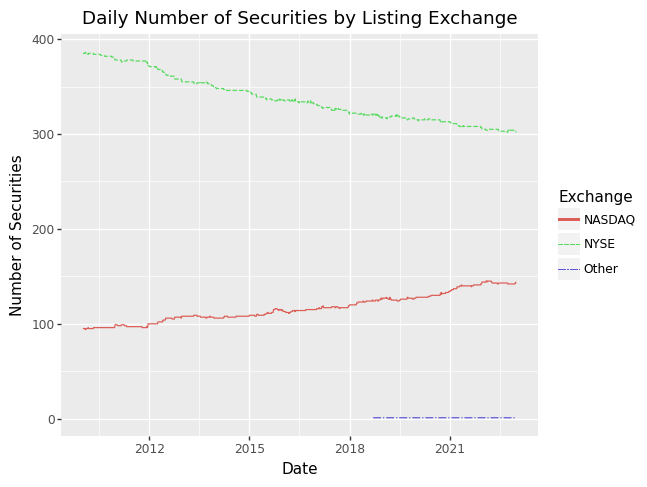

In [270]:
securities_per_exchange = (crsp_d
  .groupby(["exchange", "date"])
  .size()
  .reset_index(name="n")
)

securities_per_exchange_figure = (
  ggplot(securities_per_exchange, 
         aes(x="date", y="n", color="exchange", linetype="exchange")) +
  geom_line() + 
  labs(x="Date", y="Number of Securities", color="Exchange", linetype="Exchange",
       title="Daily Number of Securities by Listing Exchange") +
  scale_x_datetime(date_breaks="3 years", date_labels="%Y") +
  scale_y_continuous(labels=comma_format())
)

securities_per_exchange_figure.draw()

### <a id='toc3_2_2_'></a>[Number of Securities by Industry](#toc0_)

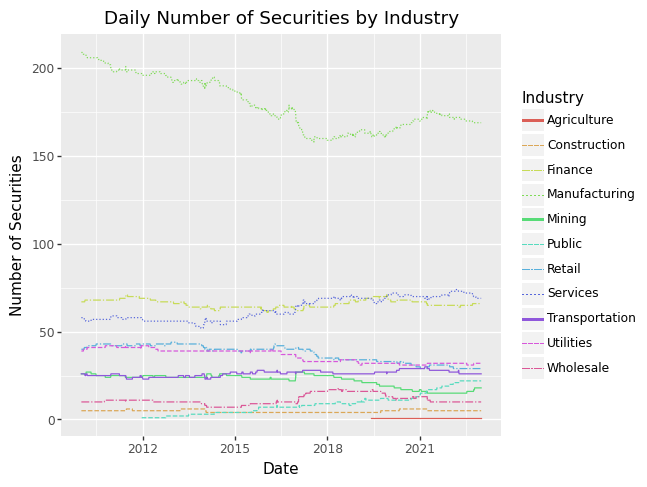

In [271]:
securities_per_industry = (crsp_d
  .groupby(["industry", "date"])
  .size()
  .reset_index(name="n")
)

linetypes = ["-", "--", "-.", ":"]
n_industries = securities_per_industry["industry"].nunique()

securities_per_industry_figure = (
  ggplot(securities_per_industry, 
         aes(x="date", y="n", color="industry", linetype="industry")) + 
  geom_line() + 
  labs(x="Date", y="Number of Securities", color="Industry", linetype="Industry",
       title="Daily Number of Securities by Industry") +
  scale_x_datetime(date_breaks="3 years", date_labels="%Y") + 
  scale_y_continuous(labels=comma_format()) +
  scale_linetype_manual(
    values=[linetypes[l % len(linetypes)] for l in range(n_industries)]
  ) 
)

securities_per_industry_figure.draw()

## <a id='toc3_3_'></a>[Distribution of Stock Prices](#toc0_)
Analyzing the distribution of stock prices can provide information about market conditions, valuation trends and potential outliers that may affect investment strategies.

### <a id='toc3_3_1_'></a>[Histogram of Stock Prices](#toc0_)
A histogram will help us understand the distribution of stock prices, highlighting the range and frequency of prices within the dataset.

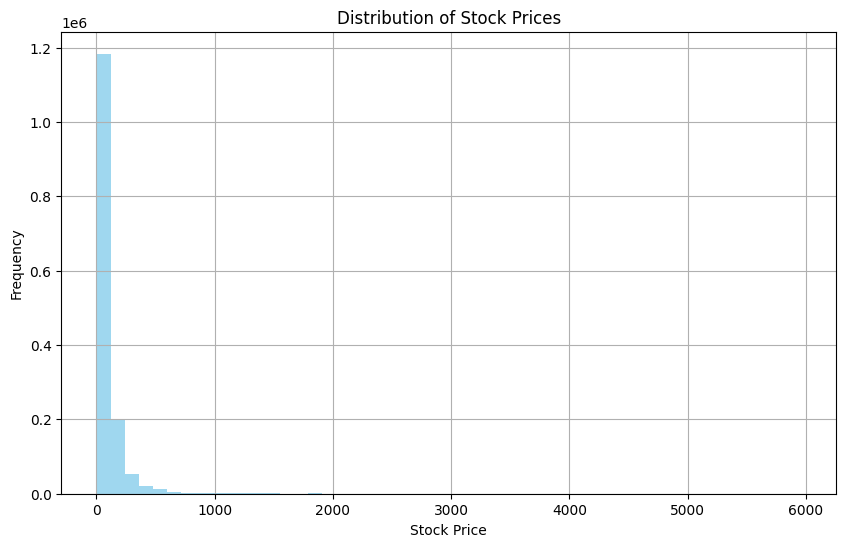

In [272]:
# Plotting the histogram of stock prices
plt.figure(figsize=(10, 6))
plt.hist(comp2['prc'], bins=50, color='skyblue', alpha=0.8)
plt.title('Distribution of Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [273]:
comp2['prc'].max()

5959.33008

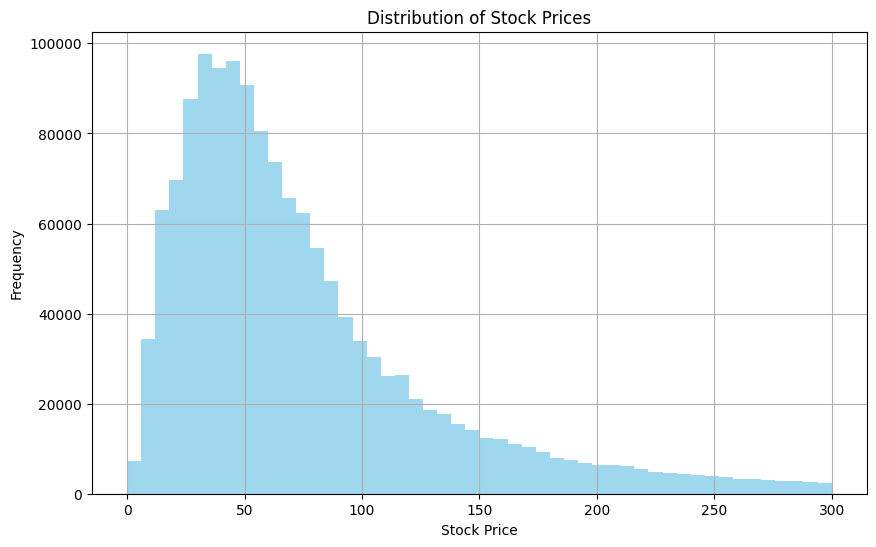

In [274]:
# Plotting the histogram of stock prices in a reduced range
plt.figure(figsize=(10, 6))
plt.hist(comp2['prc'], bins=50, range=(0,300), color='skyblue', alpha=0.8)
plt.title('Distribution of Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

It can be seen how the majority of stock prices in the dataset are concentrated below $300, indicating a right-skewed distribution. This suggests a higher frequency of lower-priced stocks with a few exceptional higher-priced outliers.

### <a id='toc3_3_2_'></a>[Box Plot of Stock Prices](#toc0_)
We now use a box plot to visualize the spread and outliers of stock prices, getting a clearer view of the distribution's quartiles and extremes.

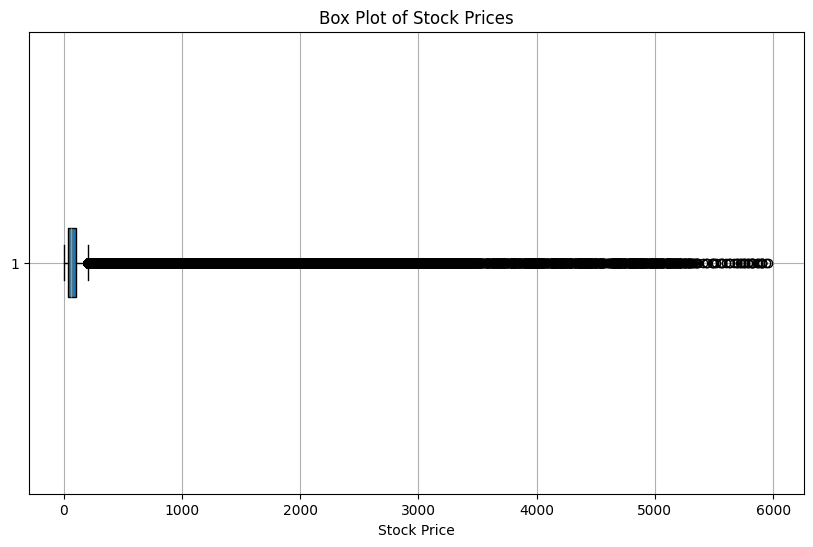

In [275]:
plt.figure(figsize=(10, 6))
plt.boxplot(comp2['prc'].dropna(), vert=False, patch_artist=True)
plt.title('Box Plot of Stock Prices')
plt.xlabel('Stock Price')
plt.grid(True)
plt.show()

The box plot of stock prices shows a distribution with a median price much lower than the mean, indicating that most stocks are priced lower. The extended whiskers and many outliers indicate that while the majority of stocks are moderately priced, a few stocks have very high prices. These high-priced outliers, which can reach up to \$6000, might belong to high-growth industries or represent stocks that have experienced significant price increases. This wide range of stock prices shows the diversity in market valuations and warns us not to make assumptions about stock performance or market trends based on average prices alone.

## <a id='toc3_4_'></a>[Price Trends Over Time](#toc0_)

Using a time series plot will help us observe trends, seasonality and any significant changes in stock prices over time.

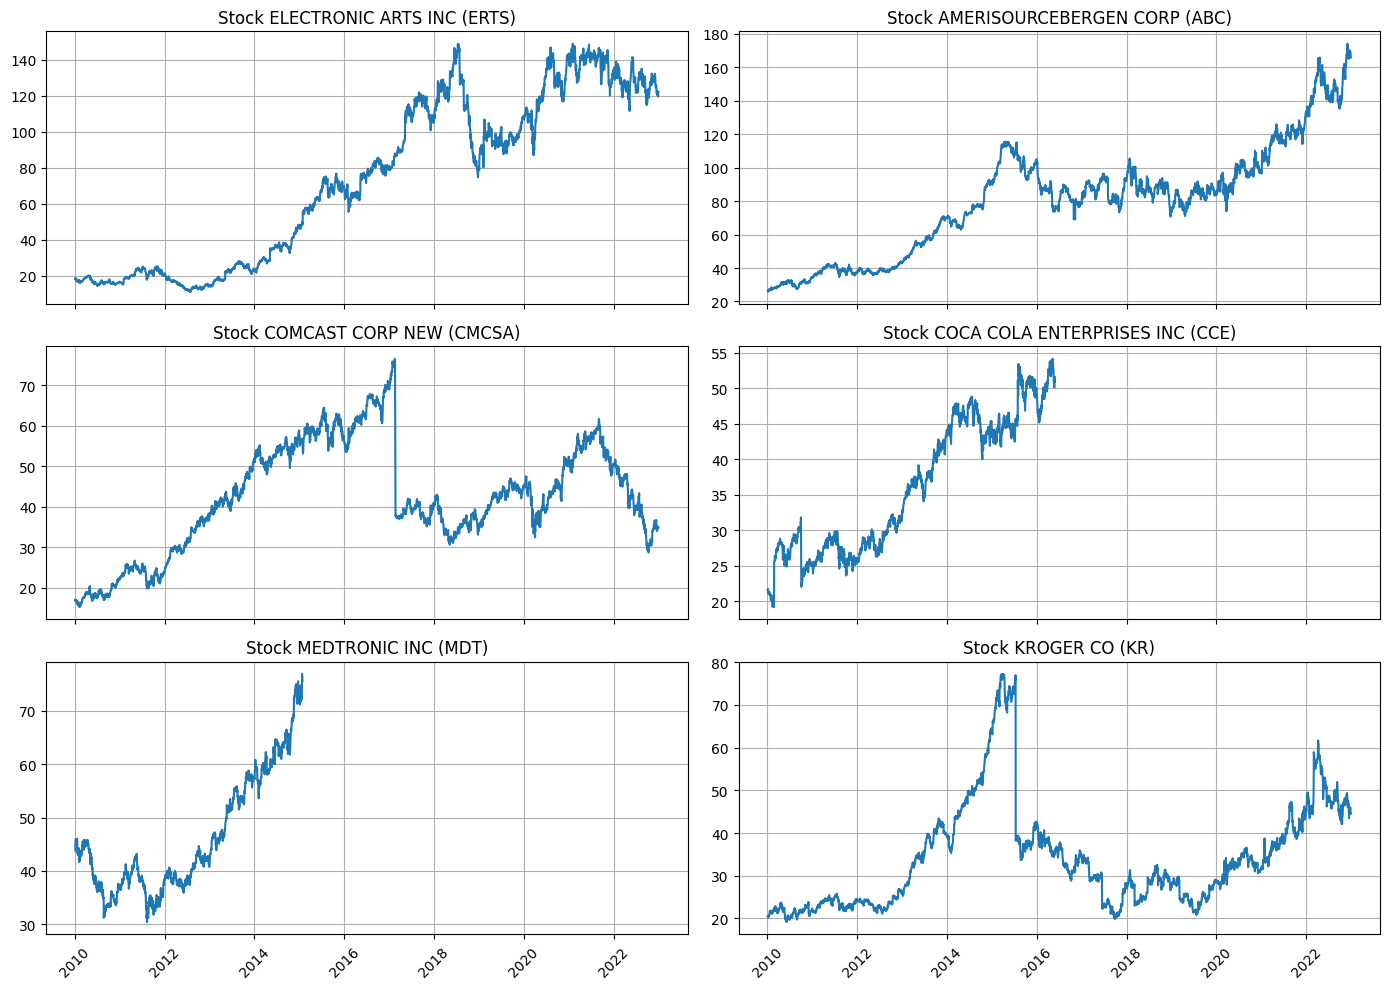

In [276]:
# Sample 6 random stocks
# random_stocks = comp2['permno'].sample(n=6, random_state=1) 

random_stocks = (75828, 81540, 89525, 70500, 60097, 16678) # Random stocks obtained

# Create subplots with 6 slots (3 rows by 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10), sharex=True)   

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, stock in enumerate(random_stocks):
    # Filter data for the current stock
    stock_data = comp2[comp2['permno'] == stock]
    # Make sure the data is sorted by date
    stock_data = stock_data.sort_values('date')

    company_name = crsp_d.loc[crsp_d['permno'] == stock, 'comnam'].iloc[0]
    ticker = crsp_d.loc[crsp_d['permno'] == stock, 'ticker'].iloc[0]

    # Plot the time series on a subplot
    axes[i].plot(stock_data['date'], stock_data['prc'])
    axes[i].set_title(f'Stock {company_name} ({ticker})')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate date labels if needed
    axes[i].grid(True)

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.show()

The time series plots for six randomly selected stocks showcase the diverse nature of stock price movements within the market. Each stock has unique behaviour, which reflects the performance of the company, sector dynamics and market conditions over time. For example, Electronic Arts Inc. (ERTS) shows a steady growth, especially from 2014 onwards, possibly indicating the company's successful product launches and market expansion.
In contrast, Kroger Co. (KR) stock price is quite volatile, with peaks around 2015, which could reflect the competitive and dynamic nature of the retail sector.

These variations tell us that it is impractical to assume a common distribution, such as the normal distribution, for stock prices. Prices are influenced by a range of factors such as earning reports, investor sentiment, macroeconomic indicators and geopolitical events. Each stock requires specific analysis to understand its potential and risks, rather than making broad assumptions based on the overall market.

## <a id='toc3_5_'></a>[Including Outliers in Predictive Modeling](#toc0_)

Since our goal is to build a model capable of predicting stock prices independently from their price scale, it is pertinent to include high-priced stocks in the analysis. Such stocks often exhibit unique behavior patterns and market responses that are influenced by different factors than those affecting the general market. Acknowledging this diversity by including outliers, the model can be trained to capture a broader spectrum of market dynamics, thus increasing its applicability and robustness.

# <a id='toc4_'></a>[Data Preprocessing](#toc0_)

## <a id='toc4_1_'></a>[Number of Days Variable](#toc0_)

First of all, we would like to add a column representing the number of days that passed after the first date we consider for our analysis (January 4, 2010). We would in fact want to include the date variable in our model, but in a numerical form instead of datetime format.

In [277]:
# Ensure 'date' is in datetime format
comp2['date'] = pd.to_datetime(comp2['date'])

# Choose a reference date as the minimum date in the dataset
reference_date = comp2['date'].min()
print(f'Reference Date: {reference_date}')

# Convert datetime column to the number of days from the reference date
comp2['date_days'] = (comp2['date'] - reference_date).dt.days

Reference Date: 2010-01-04 00:00:00


## <a id='toc4_2_'></a>[Handle Missing Data](#toc0_)

In [278]:
# Check missing values count after preprocessing
na_counts = comp2.isna().sum()
na_counts[na_counts > 0]

vol                           1
seq                          21
pstkrv                       21
pstkl                        21
pstk                         21
txdb                         21
itcb                         21
total_assets                 21
common_equity                21
total_liability              21
sales                        21
common_shares_outstanding    21
pref                         21
be                           21
bm                           21
dtype: int64

Since the number of NaN values is way smaller than the number of samples, it is safe to replace them.

In [279]:
# Identify columns with missing values
cols_with_missing = comp2.columns[comp2.isna().any()].tolist()

# Iterate over each column with missing values
for column in cols_with_missing:
    if comp2[column].dtype == 'float64':
        # Calculate the median for numeric columns
        median = comp2[column].median()
        # Fill missing values with median
        comp2[column] = comp2[column].fillna(median)
    elif comp2[column].dtype == 'O':
        # Forward fill and then backward fill for non-numeric columns
        comp2[column] = comp2[column].ffill()
        comp2[column] = comp2[column].bfill()

## <a id='toc4_3_'></a>[One-Hot Encoding of Categorical Variables](#toc0_)
To prepare our dataset for regressions and machine learning algorithms, we perform one-hot encoding on categorical variables. This process converts categorical variables into a format that can be provided to ML algorithms to do a better job in prediction. The variables `exchange`, `shrcd` and `industry` are transformed into binary columns that represent the presence of each possible value. We drop the first category in each variable to prevent multicollinearity, often referred to as the dummy variable trap.

In [280]:
# One-hot encode categorical variables
categorical_columns = ['exchange', 'shrcd', 'industry']
encoder = OneHotEncoder(drop='first')  # Dropping the first category to avoid dummy variable trap
encoded_columns = encoder.fit_transform(comp2[categorical_columns])
encoded_columns_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the original DataFrame with the new encoded DataFrame
comp2 = pd.concat([comp2.reset_index(drop=True), encoded_columns_df.reset_index(drop=True)], axis=1)

# Drop the original categorical columns
comp2.drop(categorical_columns, axis=1, inplace=True)

## <a id='toc4_4_'></a>[Useful Functions](#toc0_)

- **Features and Target Preparation**

The `features_and_target` function is designed to streamline the process of preparing datasets for modeling. It separates the features and target variable, automatically excluding the date column (due to its datetime format) and any other specified columns from the feature set.

In [281]:
def features_and_target(data, target_column, exclude_columns=None):
    """
    Prepares features and target outputs for modeling by automatically excluding the 'date' column
    and any other specified columns.
    
    Parameters:
        data (DataFrame): The dataset to process.
        target_column (str): The name of the target column.
        exclude_columns (list): List of additional column names to exclude from features. Optional.
    
    Returns:
        X (DataFrame): Features ready for modeling, with 'date' and specified columns excluded.
        y (Series): Target variable.
    """
    # Always excluding 'date'
    if exclude_columns is None:
        exclude_columns = ['date']
    else:
        exclude_columns = ['date'] + exclude_columns

    # Drop target and other specified columns from the feature set
    feature_columns = data.columns.drop([target_column] + exclude_columns)
    
    X = data[feature_columns]
    y = data[target_column]
    
    return X, y

- **MAPE (Mean Absolute Percentage Error) Computation**

The `mean_absolute_percentage_error` function is used to measure the accuracy of a model in predicting quantitative data. It calculates the average absolute percentage difference between the actual values and the predictions, which provides a clear percentage-based indication of the model’s prediction error.

In [282]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Calculates the mean absolute percentage error between actual and predicted values,
    handling cases where actual values are zero to avoid division by zero.
    
    Parameters:
        y_true (array): Actual values.
        y_pred (array): Predicted values.
    
    Returns:
        float: The mean absolute percentage error expressed as a percentage.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# <a id='toc5_'></a>[Linear Regression](#toc0_)

Linear Regression is a fundamental statistical method used in predictive modeling and machine learning to model the linear relationship between a dependent variable and one or more independent variables. It's the go-to model for getting insights into the real-world policy or business applications by quantifying the impact of interactions between predictors and an objective measure.

The main goal of linear regression is to determine the length and direction (from the average of the target) the values are separate from the other by one or more input (features) values. It predicts a real-valued output based on an input value.

The general form of a linear regression equation is:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon$$

where:
- $y$ is the dependent variable (the variable to be predicted),
- $x_1, x_2, ..., x_n$ are the predictors or the sets of true values (the feature variable),
- $\beta_0$ is the y-intercept (shows the value of $y$ when all predictors are at 0),
- $\beta_1, \beta_2, ..., \beta_n$ are the coefficients for the independent variables, representing the rate at which the variables change,
- $\epsilon$ is the error term.

## <a id='toc5_1_'></a>[Evaluation Metrics](#toc0_)

To evaluate the performance of our linear regression models, we use the following metrics to assess accuracy and efficiency:

- **Mean Squared Error (MSE)**: Measures the average squared difference between the estimated values and the actual value. It’s a common measure of prediction accuracy where a lower MSE indicates a better fit.
- **Root Mean Squared Error (RMSE)**: Represents the square root of MSE. It is interpreted in the units of the response variable and provides an understanding of the magnitude of prediction error.
- **Mean Absolute Error (MAE)**: Calculates the average absolute error between the predicted values and the actual values, offering a clear measure of prediction accuracy without overly penalizing large errors as MSE does.
- **Mean Absolute Percentage Error (MAPE)**: Expresses the prediction error as a percentage. It is particularly useful for understanding the error magnitude in relative terms, facilitating comparisons across different datasets or models.
- **R-Squared ($R^2$)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An $R^2$ near 1 suggests a high proportion of variance in the target variable accounted for by the model.


## <a id='toc5_2_'></a>[Random Train-Test Split](#toc0_)
We split our dataset into training and testing sets using a random train-test split. We use the `train_test_split` function from the `scikit-learn` library to randomly divide the data, specifically 80% used as training set and the remaining 20% is reserved for testing.

In [283]:
# Prepare features and target variable
features, target = features_and_target(comp2, 'prc', ['permno'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a pipeline that includes scaling and regression
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', LinearRegression())
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
predictions = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # Easier to interpret than MSE, same units as the target variable
mae = mean_absolute_error(y_test, predictions) # More robust towards outliers than MSE, does not exaggerate errors
mape = mean_absolute_percentage_error(y_test, predictions)  # Expresses accuracy as a percentage
r2 = r2_score(y_test, predictions)

print(f'MSE: {round(mse, 2)}')
print(f'RMSE: {round(rmse, 2)}')
print(f'MAE: {round(mae, 2)}')
print(f"MAPE: {round(mape, 2)}%")
print(f'R^2: {round(r2, 2)}')

MSE: 26123.87
RMSE: 161.63
MAE: 62.24
MAPE: 118.79%
R^2: 0.29


## <a id='toc5_3_'></a>[Time-Based Train-Test Split](#toc0_)
We now proceed by training our model on data from 2010 to 2018 and testing it on data from 2018 to 2022. Splitting the dataset based on time helps us understand how well the model can predict future stock prices using past data. This method mimics real-world scenarios where models are used to forecast future outcomes based on historical data. 

In [284]:
# Split the data based on the date
train_data = comp2[comp2['date'].dt.year <= 2018]
test_data = comp2[comp2['date'].dt.year > 2018]

# Prepare features and target variable for training and testing sets
X_train, y_train = features_and_target(train_data, 'prc', ['permno'])
X_test, y_test = features_and_target(test_data, 'prc', ['permno'])

# Create a pipeline that includes scaling and regression
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', LinearRegression())
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
predictions = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MSE: {round(mse, 2)}')
print(f'RMSE: {round(rmse, 2)}')
print(f'MAE: {round(mae, 2)}')
print(f"MAPE: {round(mape, 2)}%")
print(f'R^2: {round(r2, 2)}')

MSE: 72603.43
RMSE: 269.45
MAE: 97.03
MAPE: 93.98%
R^2: 0.19


In our analysis, we have opted for the `RobustScaler` from `scikit-learn` for preprocessing our dataset. This decision was based on the observation that the data is not normally distributed, which is common in financial datasets that often show signs of skewness and leptokurtosis. The `RobustScaler` is extremely useful in such scenarios as it employs robust statistics (median and interquartile range) to center and scale the data. This scaler's resilience to outliers ensures that our linear regression model is not disproportionately affected by extreme values. 

## <a id='toc5_4_'></a>[Performance Analysis](#toc0_)
In our regression analysis, error metrics are crucial for evaluating the accuracy of model predictions against actual stock prices. Interpreting these metrics directly can be challenging due to varying price scales, as observed in our initial price distribution analysis. However, after adjusting the price scale with the RobustScaler, the error magnitudes align closely with typical financial metrics, making these errors noteworthy.

Despite the expected accuracy of linear regression models, splitting the data into training sets from 2010-2018 and testing on 2018-2022 data reveals a significant decline in performance. This is indicated by higher error metrics and a lower R-squared (R²) value, reflecting the model’s reduced ability to generalize to new data.

This decline can be attributed to several factors:

- **Non-linear Relationships**: Stock prices are influenced by many factors such as economic indicators, company performance and market sentiment, which are inherently non-linear. Linear regression assumes a linear relationship, which is rarely the case in financial markets.

- **Market Volatility**: Events like financial crises, policy changes or technological shifts can lead to market volatility, making patterns in training data less applicable to testing data.

- **Overfitting to Past Data**: The model may have overfit to specific trends in the training data that do not generalize well to future data, especially over many years.

- **Data Stationarity**: Financial time series data often have non-stationary behaviors, where their mean, variance, and covariance change over time, causing models built on such data to perform poorly on new data.

## <a id='toc5_5_'></a>[Linear Regression on High vs. Low Priced Stocks](#toc0_)

We want to analyze how stock price levels affect the performance of linear regression models by segmenting stocks into high-priced and low-priced groups based on price quantiles. We then train separate models for each group to compare their performance.

In [285]:
# Calculate quantile thresholds for high and low-priced stocks
high_price_threshold = comp2['prc'].quantile(0.75)
low_price_threshold = comp2['prc'].quantile(0.25)

# Segment data based on these thresholds
high_priced_stocks = comp2[comp2['prc'] >= high_price_threshold]
low_priced_stocks = comp2[comp2['prc'] <= low_price_threshold]

For each segment (high-priced and low-priced stocks), we prepare the features and target variables. We also apply necessary preprocessing steps such as scaling to ensure the data is suitable for linear regression modeling.

In [286]:
# Prepare and scale high-priced stock data
X_high, y_high = features_and_target(high_priced_stocks, 'prc', ['permno'])
scaler_high = RobustScaler()
X_high_scaled = scaler_high.fit_transform(X_high)

In [287]:
# Prepare and scale low-priced stock data
X_low, y_low = features_and_target(low_priced_stocks, 'prc', ['permno'])
scaler_low = RobustScaler()
X_low_scaled = scaler_low.fit_transform(X_low)

Separate linear regression models are trained for each stock price segment. This approach allows us to directly measure and compare the impact of stock price levels on model accuracy.

In [288]:
# Train model for high-priced stocks
model_high = LinearRegression()
model_high.fit(X_high_scaled, y_high)
predictions_high = model_high.predict(X_high_scaled)

mse_high = mean_squared_error(y_high, predictions_high)
rmse_high = np.sqrt(mse_high)
mae_high = mean_absolute_error(y_high, predictions_high)
mape_high = mean_absolute_percentage_error(y_high, predictions_high)
r2_high = r2_score(y_high, predictions_high)

In [289]:
# Train model for low-priced stocks
model_low = LinearRegression()
model_low.fit(X_low_scaled, y_low)
predictions_low = model_low.predict(X_low_scaled)

mse_low = mean_squared_error(y_low, predictions_low)
rmse_low = np.sqrt(mse_low)
mae_low = mean_absolute_error(y_low, predictions_low)
mape_low = mean_absolute_percentage_error(y_low, predictions_low)
r2_low = r2_score(y_low, predictions_low)

In [290]:
print(f"High-Priced Stocks - MSE: {round(mse_high, 2)}, RMSE: {round(rmse_high, 2)}, MAE: {round(mae_high, 2)}, MAPE: {round(mape_high, 2)}, R²: {round(r2_high, 2)}")
print(f"Low-Priced Stocks - MSE: {round(mse_low, 2)}, RMSE: {round(rmse_low, 2)}, MAE: {round(mae_low, 2)}, MAPE: {round(mape_low, 2)}, R²: {round(r2_low, 2)}")

High-Priced Stocks - MSE: 48939.32, RMSE: 221.22, MAE: 101.86, MAPE: 44.88, R²: 0.56
Low-Priced Stocks - MSE: 54.15, RMSE: 7.36, MAE: 6.11, MAPE: 38.74, R²: 0.26


### <a id='toc5_5_1_'></a>[High-Priced Stocks](#toc0_)
The model for high-priced stocks shows an R-squared value of 0.56, indicating that it explains approximately 56% of the variability in the stock prices. The RMSE and MAE values are quite high, but reflect the higher range of stock prices. The MAPE of 44.88% indicates that there is still significant room for improvement in predicting high-priced stocks, given the typical volatility in the market.

### <a id='toc5_5_2_'></a>[Low-Priced Stocks](#toc0_)
For low-priced stocks, the model shows an even lower R-squared value of 0.26, meaning it only explains about 26% of the variance in stock prices. The lower RMSE and MAE are expected and reflect the lower absolute scale of stock prices in this segment. However, the higher MAPE of 38.74% suggests that linear regression is performing poorly even for this segment. The low R-squared value indicates that the model is not capturing much of the variability in the prices of these low-priced stocks and tells that other factors not included in the model might be influencing these stocks more heavily, or that their price movements are more random. 

### <a id='toc5_5_3_'></a>[Conclusions](#toc0_)
The R-squared values indicate that high-priced stocks fit the model better than low-priced stocks. Although the percentage errors (MAPE) for both segments are similar, the higher R-squared value for high-priced stocks means the model explains more of the variance for this group.
This discrepancy can be attributed to the different behaviors and dynamics of high-priced and low-priced stocks. High-priced stocks are often more established and have more predictable patterns influenced by fewer factors. In contrast, low-priced stocks are affected by many more market factors, making them more volatile and harder to predict. Additionally, the dataset contains a larger number of low-priced stocks, contributing to increased variability and a lower R-squared value for this segment.

# <a id='toc6_'></a>[Lasso Regression](#toc0_)

To try and improve linear regression, we employ Lasso regression (Least Absolute Shrinkage and Selection Operator), an extension of linear regression that includes regularization to prevent overfitting. It adds a penalty equal to the absolute value of the magnitude of the coefficients to the loss function, which can shrink some coefficients to zero. This makes lasso regression useful not only for prediction but also for identifying and selecting important features in the model, while discarding irrelevant ones. This can reduce complexity and lead to better generalization and more robust predictions.

The lasso regression equation is the same as linear regression, but adds a regularization term to the loss:

$$\text{Loss} = \text{RSS} + \lambda \sum_{j=1}^{n} |\beta_j|$$

where RSS is the residual sum of squares and $\lambda$ is the regularization parameter that controls the strength of the penalty.

Limitations of Lasso regression are:

- **Selection of $\lambda$**: The model's performance is sensitive to the choice of $\lambda$. Cross-validation is essential to find an optimal value.
- **Bias**: For very high values of $\lambda$, LASSO can introduce bias into the model, making it underfit.

In [291]:
# It's important to scale features when using regularization
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use LassoCV to find the optimal alpha and fit the model
lasso = LassoCV(cv=10, random_state=0, max_iter=10000).fit(X_train_scaled, y_train)

# Identify features with non-zero coefficients (selected features)
selected_features = features.columns[(lasso.coef_ != 0)]

print(f"Selected features: {list(selected_features)}")

# Training a new model using only the selected features
X_train_selected = X_train_scaled[:, lasso.coef_ != 0]
X_test_selected = X_test_scaled[:, lasso.coef_ != 0]

# Retraining a linear regression model
model_selected = LinearRegression().fit(X_train_selected, y_train)

# Predict and evaluate using the selected features
predictions_selected = model_selected.predict(X_test_selected)
mse_selected = mean_squared_error(y_test, predictions_selected)
rmse_selected = np.sqrt(mse_selected)
mae_selected = mean_absolute_error(y_test, predictions_selected)
mape_selected = mean_absolute_percentage_error(y_test, predictions_selected)
r2_selected = r2_score(y_test, predictions_selected)

print("Metrics with selected features:")
print(f'MSE: {round(mse_selected, 2)}')
print(f'RMSE: {round(rmse_selected, 2)}')
print(f'MAE: {round(mae_selected, 2)}')
print(f"MAPE: {round(mape_selected, 2)}%")
print(f'R^2: {round(r2_selected, 2)}')

Selected features: ['vol', 'shrout', 'tso', 'me', 'me_comp', 'pstkrv', 'pstkl', 'pstk', 'txdb', 'sales', 'common_shares_outstanding', 'pref', 'be', 'bm', 'date_days', 'exchange_NYSE', 'industry_Services', 'industry_Utilities']
Metrics with selected features:
MSE: 72334.12
RMSE: 268.95
MAE: 97.37
MAPE: 96.58%
R^2: 0.2


The `LassoCV` model was used to identify and select the most important features from the dataset. This resulted in the exclusion of only a few of the all the features, meaning that most of the features were considered relevant by the algorithm. Then, a standard linear regression model was trained using only the selected features. The model performed almost identically to linear regression trained on all the features. This indicates that, in this case, removing less relevant features does not really impact the model's predictive ability, most likely because the original features were already optimal for prediction.

# <a id='toc7_'></a>[Neural Networks](#toc0_)

Neural networks are a class of machine learning models designed to simulate the behavior of the human brain. This allows them to recognize patterns and model complex, non-linear relationships, which perfectly adapts to the dynamism of financial time series. A neural network consists of layers of interconnected nodes or neurons, which process input data and learn patterns through training. They generally include an input layer, which receives the initial data, one or more hidden layers, performing computations through their activation functions, and an output layer, which produces the final output of the model.

# <a id='toc8_'></a>[LSTM (Long Short-Term Memory) Networks](#toc0_)
LSTM networks are a special kind of recurrent neural network (RNN) capable of learning long-term dependencies in data sequences. They were introduced to overcome the limitations of traditional RNNs that face difficulties in learning long-range temporal dependencies due to the vanishing gradient problem, a situation where the gradients used in the network's training either grow too large or shrink over time, leading to an unstable training process.

### <a id='toc8_1_1_'></a>[Structure of LSTM Networks](#toc0_)

An LSTM unit typically consists of a cell, an input gate, an output gate, and a forget gate. These components work together to regulate the flow of information into and out of the cell, allowing the network to effectively remember or forget information:

- **Cell State**: Represents the internal memory of the unit, which carries relevant information throughout the processing of the sequence.
- **Input Gate**: Controls how much new information flows into the cell state.
- **Forget Gate**: Decides how much information is discarded from the cell state.
- **Output Gate**: Determines what the next hidden state should be, which contains information about the current input, and is used for predictions.

## <a id='toc8_2_'></a>[Single Layer, Single Asset, Price Only](#toc0_)

We begin the neural network approach with the base LSTM case: we try to predict the price of a single asset using only its historical price data. Moreover, we will only use one LSTM layer to understand the model's basic capabilities.

In [292]:
comp2 = comp2.sort_values(['date', 'permno'])
comp2.head()

,permno,date,ret,vol,shrout,prc,tso,me,me_comp,seq,...,industry_Construction,industry_Finance,industry_Manufacturing,industry_Mining,industry_Public,industry_Retail,industry_Services,industry_Transportation,industry_Utilities,industry_Wholesale
0,10078,2010-01-04,0.001067,7092924.0,753940.0,9.38,7.539400e+08,7071.95720,7071.95720,39776.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,10104,2010-01-04,0.013045,26919420.0,5011220.0,24.85,5.011220e+09,124528.81700,124528.81700,39776.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3288,10107,2010-01-04,0.015420,38564668.0,8811000.0,30.95,8.811000e+09,272700.45000,272700.45000,46175.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6560,10137,2010-01-04,0.001704,2719900.0,169563.0,23.52,1.695630e+08,3988.12176,3988.12176,46175.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6850,10138,2010-01-04,0.021596,2417762.0,258534.0,54.40,2.585340e+08,14064.24960,14064.24960,46175.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here, we specifically select the Johnson & Johnson (JNJ) asset from our dataset and visualize its price trend over time. We will then build and evaluate our LSTM model on this particular asset. The reason behind the choice of JNJ is that it is a stable and well-established company within the S&P 500, so we consider these results as representative for our model analysis.

PERMNO for Johnson & Johnson: 22111


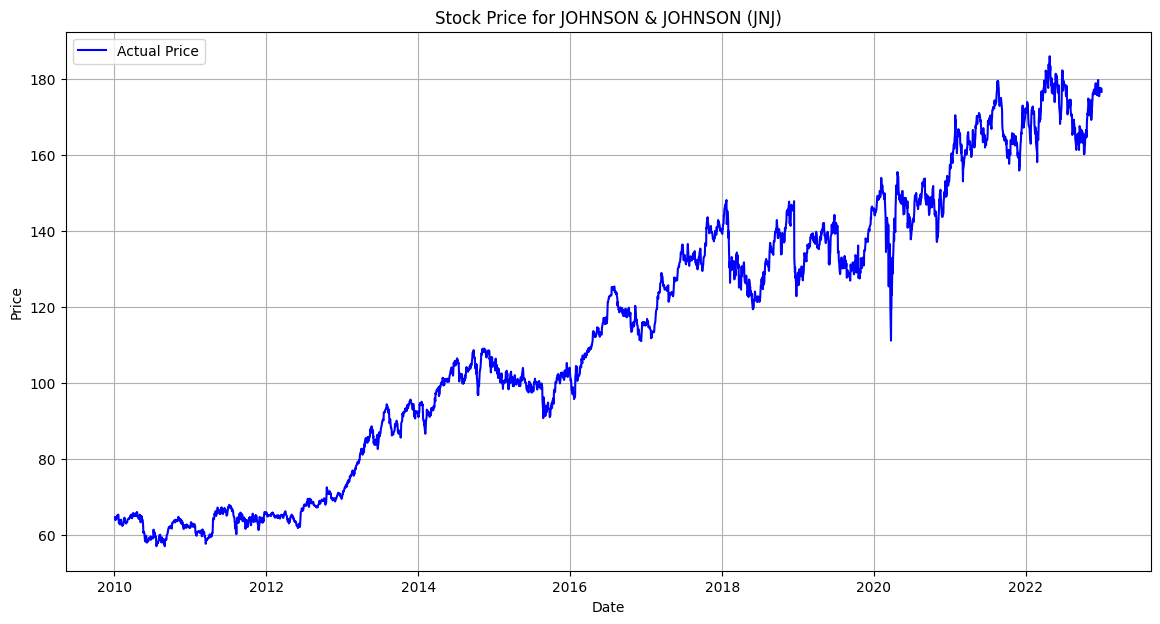

In [293]:
permno = crsp_d.loc[crsp_d['ticker'] == 'JNJ', 'permno'].values[0]

print("PERMNO for Johnson & Johnson:", permno)

df = comp2.loc[comp2['permno'] == permno]

# Get the company name and ticker
company_name = crsp_d.loc[crsp_d['permno'] == permno, 'comnam'].iloc[0]
ticker = crsp_d.loc[crsp_d['permno'] == permno, 'ticker'].iloc[0]

# Plot the stock price for the selected company
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['prc'], label='Actual Price', color='blue')
plt.title(f'Stock Price for {company_name} ({ticker})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [294]:
print(f"The time series has", len(df['prc']), "time steps.")

The time series has 3272 time steps.


### <a id='toc8_2_1_'></a>[Data Preprocessing](#toc0_)

Training an LSTM model requires careful preparation of time-series data. This preparation involves several key steps: splitting the data, normalizing it and creating sequences that the LSTM model can process. Sequences are essential for LSTM models because they rely on past information to make predictions. Each sequence provides a window of past data points used to forecast the next data point.

In [295]:
# Splitting the data into training and test sets
timeseries = df[['prc']].values.astype('float32')
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

### <a id='toc8_2_2_'></a>[Normalization](#toc0_)
LSTM models are really sensitive to the scale of input data, this is why we normalize data before training. Here, we use MinMax scaling to transform the stock prices to a scale of 0 to 1. This helps in speeding up the convergence during training by maintaining a consistent scale across the input features.

In [296]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

### <a id='toc8_2_3_'></a>[Creating Sequences](#toc0_)
LSTM models expect input in the form of sequences. For time series forecasting, it’s crucial to convert the series into overlapping sequences (windows) of a fixed size. We achieve this through the following `create_dataset` function. Each sequence serves as input to the LSTM, with the model learning to predict the value at the next time step.

The `lookback` parameter defines the number of previous time steps used to predict the next time step. In our case, a lookback of 10 means using the past 10 values to predict the next value.

Moreover, PyTorch models require input data in the form of Torch tensors, so at the end of our dataset creation we convert arrays to tensors.

In [297]:
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset.
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+lookback]
        X.append(feature)
        y.append(target)
    X = np.array(X)
    y = np.array(y)
    return torch.tensor(X), torch.tensor(y)

In [298]:
lookback = 10

X_train, y_train = create_dataset(train_scaled, lookback=lookback)
X_test, y_test = create_dataset(test_scaled, lookback=lookback)

print("Train data shapes:", X_train.shape, y_train.shape)
print("Test data shapes:", X_test.shape, y_test.shape)

Train data shapes: torch.Size([2182, 10, 1]) torch.Size([2182, 1])
Test data shapes: torch.Size([1070, 10, 1]) torch.Size([1070, 1])


### <a id='toc8_2_4_'></a>[Building the LSTM Model](#toc0_)
We build an LSTM class which defines a simple LSTM network for time series prediction. The class initializes with a single LSTM layer followed by a linear layer:

- **LSTM Layer**: This layer takes sequences with a single feature (input_size=1) and processes through 50 hidden units (hidden_size=50). The batch_first=True parameter ensures that the input tensors are expected to have a batch dimension first.

- **Linear Layer**: After the LSTM processes the input data, the output passes through a linear (fully connected) layer, which maps the hidden state at the last timestep to a single output value, representing the predicted value at the next timestep.

- **Forward Pass**: In the forward method, the input data x is passed through the LSTM layer, followed by the linear layer. The output from the linear layer at the last timestep is selected for each sequence in the batch (using x[:,-1,:]), making it suitable for time series forecasting where we’re interested in the next value prediction.

In [299]:
class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x[:,-1,:]

### <a id='toc8_2_5_'></a>[Training and Testing the Model](#toc0_)
The following code sets up and trains an LSTM model for our price prediction. The model is trained over 100 epochs with a batch size of 4, using Adam (Adaptive Momentum) as the optimizer and Mean Squared Error (MSE) as the loss function:

- **Data Loader**: Data is loaded in minibatches using `DataLoader`, which shuffles the training data to ensure random sampling of batches.

- **Training Loop**: Each epoch consists of a forward pass (predicting outputs for the current batch of input data), loss calculation (difference between predictions and actual data with MSE) and backpropagation (computing gradients and adjusting model weights to minimize the loss).

- **Validation**: To monitor the performance of the model, during each epoch the model switches to evaluation mode, to calculate the RMSE (Root Mean Squared Error) for both the training and testing datasets. Additionally, we will plot the RMSE values over time to visualize the error evolution and better understand the training process.

In [300]:
# Initialize the model
model = LSTM()
optimizer = optim.Adam(model.parameters()) 
loss_fn = nn.MSELoss() # Loss Function

# Data loading handling minibatches and shuffling
loader = DataLoader(TensorDataset(X_train, y_train), shuffle=True, batch_size=4)

n_epochs = 100

# Lists to store the RMSE values
train_rmse_list = []
test_rmse_list = []

for epoch in range(n_epochs+1):
    
    # Setting the model to training mode
    model.train()

    for X_batch, y_batch in loader:

        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(X_batch)

        # Compute loss
        loss = loss_fn(y_pred, y_batch)

        # Backpropagation steps
        optimizer.zero_grad() # Clear gradients before calculating them
        loss.backward() # Calculate gradients
        optimizer.step() # Update model parameters

    # Validation every epoch
    model.eval()
    with torch.no_grad(): # Turn off gradients for validation, memory and computations
        y_pred_train = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred_train, y_train).item())
        train_rmse_list.append(train_rmse)
        
        y_pred_test = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred_test, y_test).item())
        test_rmse_list.append(test_rmse)
        
    if epoch % 20 == 0:
        print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

# Print final evaluation metrics
print("")
print("Final evaluation metrics:")
print(f'Train RMSE: {train_rmse_list[-1]:.4f}')
print(f'Test RMSE: {test_rmse_list[-1]:.4f}')

Epoch 0: train RMSE 0.0205, test RMSE 0.0976
Epoch 20: train RMSE 0.0102, test RMSE 0.0265
Epoch 40: train RMSE 0.0131, test RMSE 0.0267
Epoch 60: train RMSE 0.0105, test RMSE 0.0283
Epoch 80: train RMSE 0.0100, test RMSE 0.0252
Epoch 100: train RMSE 0.0097, test RMSE 0.0253

Final evaluation metrics:
Train RMSE: 0.0097
Test RMSE: 0.0253


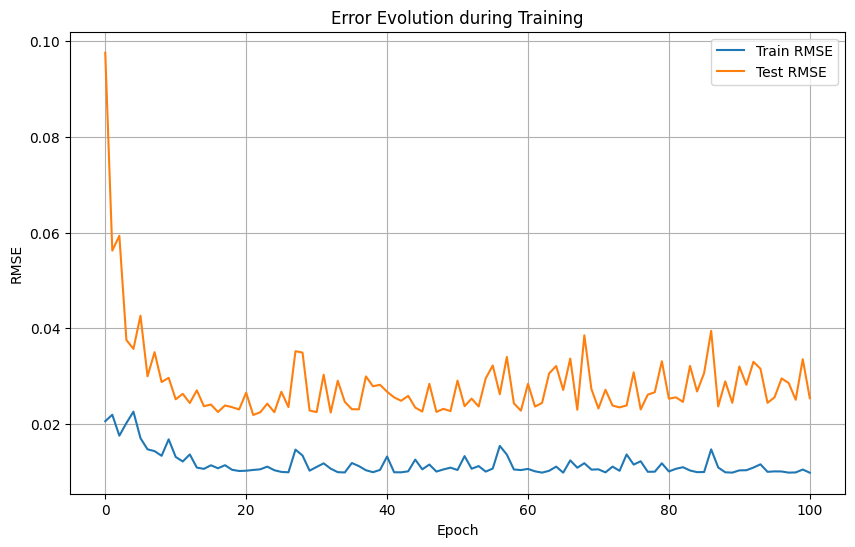

In [301]:
# Plotting the error evolution
plt.figure(figsize=(10, 6))
plt.plot(train_rmse_list, label='Train RMSE')
plt.plot(test_rmse_list, label='Test RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Error Evolution during Training')
plt.legend()
plt.grid(True)
plt.show()

From the plot, it can be seen how both errors undergo an initial decline, with test RMSE having a significant drop. After epoch 20, the errors seem to stabilize at low enough values, meaning that the model begins to capture the underlying patterns in the data. However, as training progresses, there still are noticeable fluctuations, especially in the test RMSE, due to variability in the performance of the model on different batches of data.

### <a id='toc8_2_6_'></a>[Visualizing Predictions](#toc0_)

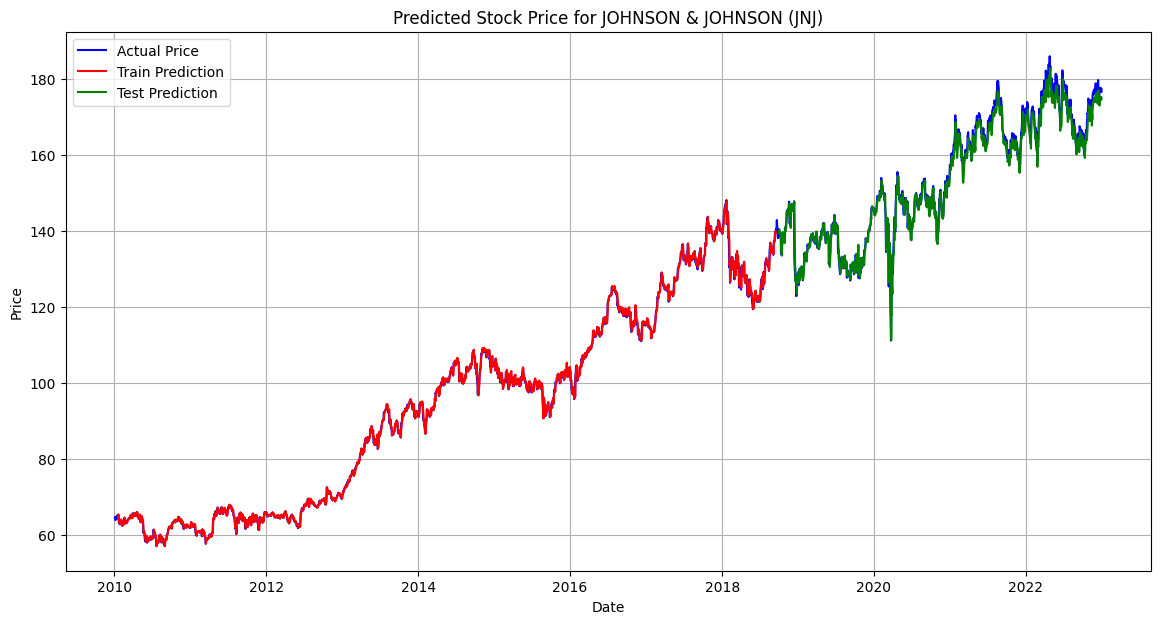

In [302]:
with torch.no_grad():
    # Shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan

    train_pred = model(X_train)
    test_pred = model(X_test)
    
    train_plot[lookback:train_size] = scaler.inverse_transform(train_pred)

    # Shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:] = scaler.inverse_transform(test_pred)

# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['prc'], label='Actual Price', color='blue')
plt.plot(df['date'].iloc[lookback:train_size], train_plot[lookback:train_size], label='Train Prediction', color='red')
plt.plot(df['date'].iloc[train_size+lookback:], test_plot[train_size+lookback:], label='Test Prediction', color='green')
plt.title(f'Predicted Stock Price for {company_name} ({ticker})')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

### <a id='toc8_2_7_'></a>[Performance Analysis](#toc0_)

The graph shows predictive capabilities of the LSTM model during training and testing phases. The red line (train prediction) closely follows the actual stock prices (blue line), indicating strong learning during training. In the test phase, the green line shows the model's ability to generalize, closely mirroring the actual price trends despite not being exposed to this data during training.

The final RMSE values indicate high accuracy, with relatively small errors suggesting that the predictions are very close to the true values. The low RMSE on both training and testing data confirms that the model is effective in capturing and predicting the underlying patterns in the stock price data.

## <a id='toc8_3_'></a>[Gradient Clipping](#toc0_)
Gradient clipping is a technique used to counteract the exploding gradients problem in training deep neural networks, particularly LSTMs. In scenarios where model training involves processing through numerous layers, gradients can grow exponentially during backpropagation. This results in large updates to the model weights, potentially leading to numerical instability and an inability for the model to converge.

In this specific context, the use of gradient clipping is introduced as a way to maintain computational stability and improve the convergence rate during training. By capping the gradients to a threshold (1.0 in this case), it prevents the gradients from becoming too large, which can interfere with the learning process. It ensures that each update is significant enough to improve learning without being so large that it causes instability or overshooting of the optimal values. This allows us to increase the number of training epochs from 100 to 500.

## <a id='toc8_4_'></a>[Early Stopping](#toc0_)
Early stopping is a form of regularization used to prevent overfitting when training a deep learning model. It works by monitoring the model’s performance on a validation dataset during training and stopping the training process if the model’s performance ceases to improve or begins to deteriorate. This approach not only helps in saving computational resources but also ensures that the model does not learn noise and complex patterns from the training data that do not generalize to unseen data.

Here, early stopping is employed as a safeguard against overfitting, since we are dealing with complex LSTM architectures. By setting a patience parameter, training is stopped after several epochs if there is no improvement in the prediction error on the validation set. This allows to maintain a balance between learning from the data and maintaining the ability to perform well on unseen data, thus enhancing the model’s ability to generalize. Note that the choice of patience parameter equal to 40 means that the training will stop after 40 epochs that the error does not improve.

Moreover, from now on, we will introduce training, validation and visualization as functions, to reduce the code.

In [303]:
# Training and Validation function with both gradient clipping and early stopping

def train_and_validate(model, optimizer, loss_fn, X_train, y_train, X_test, y_test, config_hyperparam):
    """
    Train and validate a PyTorch model.

    Args:
        model (torch.nn.Module): The neural network model to train.
        optimizer (torch.optim.Optimizer): Optimizer for updating model weights.
        loss_fn: Loss function used to evaluate model performance.
        X_train, y_train: Training data and labels.
        X_test, y_test: Testing data and labels.
        config_hyperparam (dict): Dictionary containing hyperparameters like learning rate, batch size, number of epochs, and clip value.
    """
    loader = DataLoader(TensorDataset(X_train, y_train), shuffle=True, batch_size=config_hyperparam['batch_size'])
    best_loss = float('inf')
    epochs_no_improve = 0
    patience = 40  # Number of evaluation epochs to wait after last time validation loss improved.

    train_rmse_list = []
    test_rmse_list = []

    for epoch in range(config_hyperparam['n_epochs']+1):
        model.train()
        for X_batch, y_batch in loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), config_hyperparam['clip_value']) # Gradient Clipping to avoid explosion
            optimizer.step()


        model.eval()
        with torch.no_grad():
            y_pred_train = model(X_train)
            train_rmse = np.sqrt(loss_fn(y_pred_train, y_train))
            train_rmse_list.append(train_rmse)

            y_pred_test = model(X_test)
            test_rmse = np.sqrt(loss_fn(y_pred_test, y_test))
            test_rmse_list.append(test_rmse)    

            # Early Stopping Condition
            if test_rmse < best_loss:
                best_loss = test_rmse
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1

            if epoch % 20 == 0:
                print(f"Epoch {epoch}: Train RMSE {train_rmse:.4f}, Test RMSE {test_rmse:.4f}")

            if epochs_no_improve >= patience:
                print("")
                print(f"Early stopping triggered at epoch {epoch}!")
                break
            
    print("Training and validation complete.")
    print("")
    print("Final evaluation metrics:")
    print(f'Train RMSE: {train_rmse_list[-1]:.4f}')
    print(f'Test RMSE: {test_rmse_list[-1]:.4f}')   

    # Plotting the error evolution
    plt.figure(figsize=(10, 6))
    plt.plot(train_rmse_list, label='Train RMSE')
    plt.plot(test_rmse_list, label='Test RMSE')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.title('Error Evolution during Training')
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch 0: Train RMSE 0.0634, Test RMSE 0.1236
Epoch 20: Train RMSE 0.0168, Test RMSE 0.0392
Epoch 40: Train RMSE 0.0235, Test RMSE 0.0362
Epoch 60: Train RMSE 0.0120, Test RMSE 0.0271
Epoch 80: Train RMSE 0.0108, Test RMSE 0.0232
Epoch 100: Train RMSE 0.0107, Test RMSE 0.0251
Epoch 120: Train RMSE 0.0101, Test RMSE 0.0219
Epoch 140: Train RMSE 0.0125, Test RMSE 0.0336

Early stopping triggered at epoch 154!
Training and validation complete.

Final evaluation metrics:
Train RMSE: 0.0162
Test RMSE: 0.0290


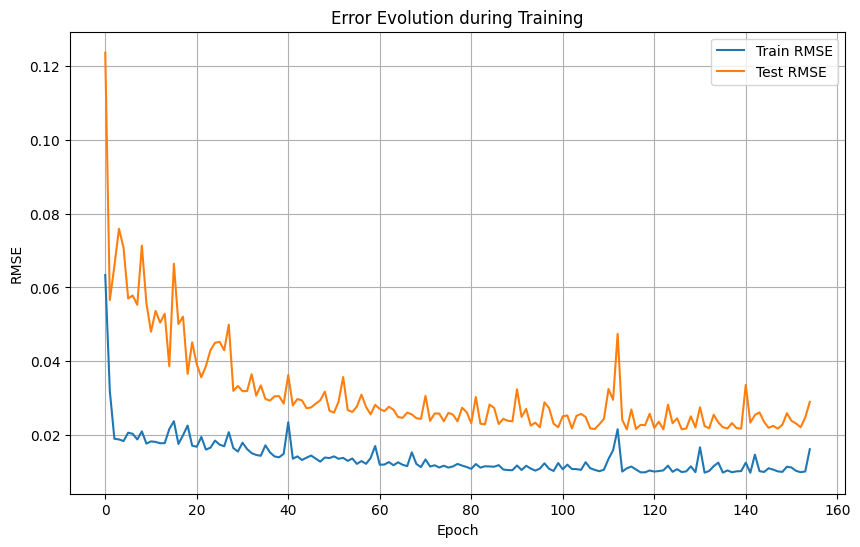

In [304]:
config_hyperparam = {
    'lr': 0.001,
    'batch_size': 32,
    'n_epochs': 500,
    'clip_value': 1.0,
}

model = LSTM()
optimizer = optim.Adam(model.parameters(), lr=config_hyperparam['lr'])
loss_fn = nn.MSELoss()

train_and_validate(model, optimizer, loss_fn, X_train, y_train, X_test, y_test, config_hyperparam)

In [305]:
def plot_predictions(model, X_train, y_train, X_test, y_test, dates, lookback, train_size, scaler):
    """
    Generates and plots predictions using the trained model for both training and test datasets.
    
    Args:
        model (nn.Module): The trained LSTM model.
        X_train (Tensor): Training features.
        y_train (Tensor): Training targets.
        X_test (Tensor): Test features.
        y_test (Tensor): Test targets.
        dates (np.array): Array of dates corresponding to the entire dataset.
        lookback (int): Number of past observations the model uses to predict future values.
        train_size (int): Size of the training dataset.
        scaler (MinMaxScaler): Scaler used for normalizing the data.
    """
    with torch.no_grad():
        train_pred = model(X_train)
        test_pred = model(X_test)

        # Inverse transform the scaled predictions
        train_pred = scaler.inverse_transform(train_pred)
        test_pred = scaler.inverse_transform(test_pred)

        # Prepare the plot arrays
        train_plot = np.ones_like(timeseries) * np.nan
        train_plot[lookback:train_size] = train_pred

        test_plot = np.ones_like(timeseries) * np.nan
        test_plot[train_size + lookback:] = test_pred

    # Plot the actual and predicted values
    plt.figure(figsize=(14, 7))
    plt.plot(dates, df['prc'], label='Actual Price', color='blue')
    plt.plot(dates[lookback:train_size], train_plot[lookback:train_size], label='Train Prediction', color='red')
    plt.plot(dates[train_size + lookback:], test_plot[train_size + lookback:], label='Test Prediction', color='green')
    plt.title(f'Predicted Stock Price for {company_name} ({ticker})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

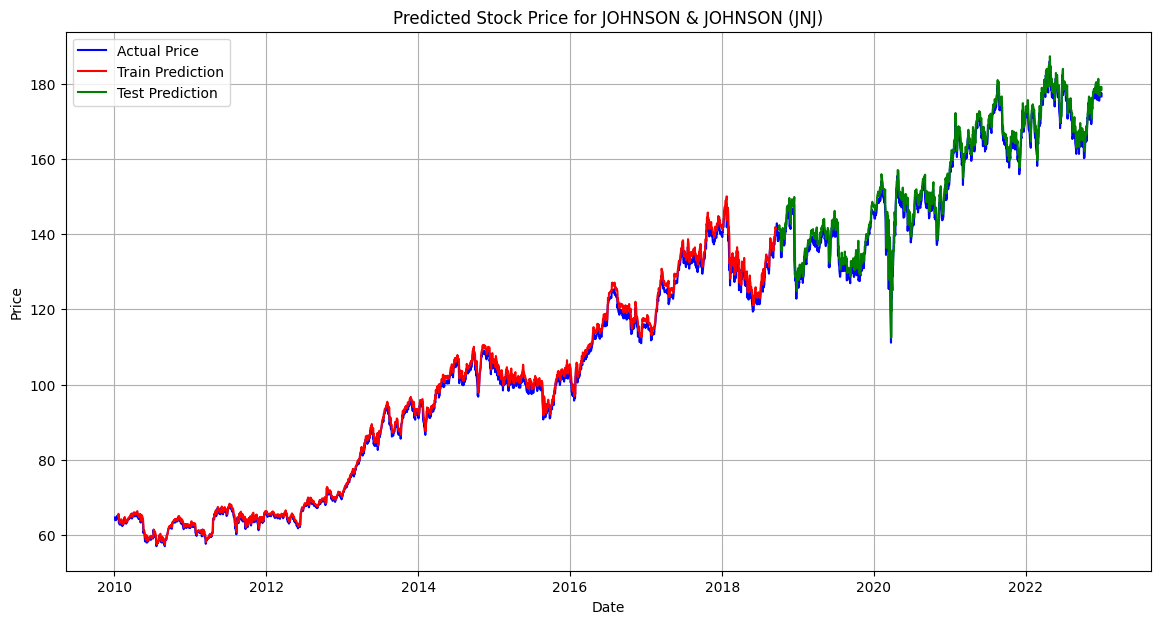

In [306]:
dates = df['date']

plot_predictions(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    dates=dates,
    lookback=lookback,
    train_size=train_size,
    scaler=scaler
)

Gradient clipping and early stopping have indeed proven to be an effective strategy in optimizing our LSTM model. By capping the gradients to a threshold and stopping training before the model gets worse, we’ve managed to stabilize the training process, increase convergence speed and mantain the model’s generalization on unseen data. The RMSE values are indeed similar both for training and testing data.

## <a id='toc8_5_'></a>[Extension to Multiple Variables](#toc0_)
We now want to analyze the impact of using multiple variables to improve the predictive accuracy of our LSTM model. By including additional features such as trading volume, book-to-market ratios and industry-specific indicators, we would like to capture a wider range of market dynamics and identify more complex patterns in the data.

In [307]:
# Define columns used for input and the target
input_cols = ['prc', 'ret', 'vol', 'tso', 'me', 'be', 'bm', 'date_days',
              'industry_Construction', 'industry_Finance', 'industry_Manufacturing',
              'industry_Mining', 'industry_Public', 'industry_Retail', 
              'industry_Services', 'industry_Transportation', 
              'industry_Utilities', 'industry_Wholesale']
target_col = 'prc'

features = df[input_cols].values.astype('float32')
target = df[[target_col]].values.astype('float32')

### <a id='toc8_5_1_'></a>[Normalization](#toc0_)

In [308]:
# Initialize separate scalers for features and target
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Split data into training and test sets before scaling
train_size = int(len(features) * 0.67)
features_train, features_test = features[:train_size], features[train_size:]
target_train, target_test = target[:train_size], target[train_size:]

# Scale features and target separately
features_train_scaled = feature_scaler.fit_transform(features_train)
features_test_scaled = feature_scaler.transform(features_test)
target_train_scaled = target_scaler.fit_transform(target_train)
target_test_scaled = target_scaler.transform(target_test)

### <a id='toc8_5_2_'></a>[Creating Sequences](#toc0_)
Note that we need to adjust the `create_dataset` function to work with separate features and target.

In [309]:
def create_dataset(features, target, lookback):
    X, y = [], []
    for i in range(len(features) - lookback):
        feature = features[i:(i + lookback), :]  # Slicing the feature
        target_value = target[i + lookback, :]  # Only the next single value right after the lookback period
        X.append(feature)
        y.append(target_value)
    X = np.array(X)
    y = np.array(y)
    return torch.tensor(X), torch.tensor(y)

In [310]:
lookback = 10

X_train, y_train = create_dataset(features_train_scaled, target_train_scaled, lookback=lookback)
X_test, y_test = create_dataset(features_test_scaled, target_test_scaled, lookback=lookback)

print("Train data shapes:", X_train.shape, y_train.shape)
print("Test data shapes:", X_test.shape, y_test.shape)

Train data shapes: torch.Size([2182, 10, 18]) torch.Size([2182, 1])
Test data shapes: torch.Size([1070, 10, 18]) torch.Size([1070, 1])


### <a id='toc8_5_3_'></a>[Building the Multivariate LSTM Model](#toc0_)
A slight change needs to be performed to our LSTM class: the input size is not 1 anymore, but depends on the total number of features we consider.

In [311]:
class MultivarLSTM(nn.Module):
    def __init__(self, input_size, hidden_layer_size, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        pred = self.linear(lstm_out)
        return pred[:,-1,:]

### <a id='toc8_5_4_'></a>[Training and Testing the Model](#toc0_)

Epoch 0: Train RMSE 0.0428, Test RMSE 0.0783
Epoch 20: Train RMSE 0.0141, Test RMSE 0.0266
Epoch 40: Train RMSE 0.0112, Test RMSE 0.0253
Epoch 60: Train RMSE 0.0104, Test RMSE 0.0330
Epoch 80: Train RMSE 0.0107, Test RMSE 0.0301
Epoch 100: Train RMSE 0.0101, Test RMSE 0.0319

Early stopping triggered at epoch 113!
Training and validation complete.

Final evaluation metrics:
Train RMSE: 0.0103
Test RMSE: 0.0290


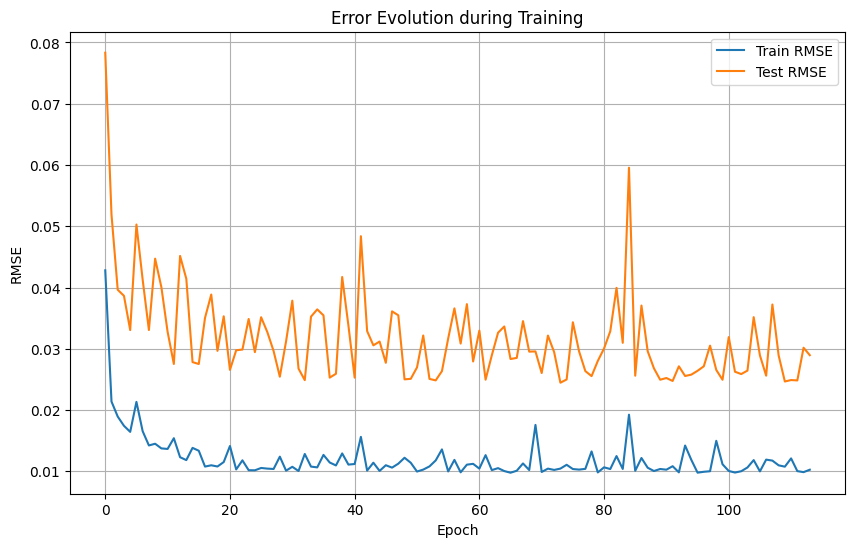

In [312]:
config_hyperparam = {
    'lr': 0.001,
    'batch_size': 32,
    'n_epochs': 500,
    'clip_value': 1.0,
}

input_size = X_train.shape[2]
model = MultivarLSTM(input_size=input_size, hidden_layer_size=50, num_layers=1)
optimizer = optim.Adam(model.parameters(), lr=config_hyperparam['lr']) 
loss_fn = nn.MSELoss()

train_and_validate(model, optimizer, loss_fn, X_train, y_train, X_test, y_test, config_hyperparam)

In [313]:
def plot_multivar_predictions(model, X_train, y_train, X_test, y_test, df, lookback, train_size, scaler, permno):
    """
    Generates and plots predictions using the trained model for both training and test datasets.
    
    Args:
        model (nn.Module): The trained LSTM model.
        X_train (Tensor): Training features.
        y_train (Tensor): Training targets.
        X_test (Tensor): Test features.
        y_test (Tensor): Test targets.
        df (DataFrame): DataFrame containing the 'prc' column used for plotting the actual prices.
        lookback (int): Number of past observations the model uses to predict future values.
        train_size (int): Size of the training dataset.
        scaler (MinMaxScaler): Scaler used for normalizing the data.
    """
    with torch.no_grad():
        train_pred = model(X_train)
        test_pred = model(X_test)

        # Inverse transform the scaled predictions
        train_pred = scaler.inverse_transform(train_pred)
        test_pred = scaler.inverse_transform(test_pred)

        # Prepare the plot arrays
        timeseries = df[['prc']].values.astype('float32')
        train_plot = np.ones_like(timeseries[:,-1].reshape(-1,1)) * np.nan
        train_plot[lookback:train_size] = train_pred
        train_plot = np.concatenate(train_plot)

        test_plot = np.ones_like(timeseries[:,-1].reshape(-1,1)) * np.nan
        test_plot[train_size + lookback:] = test_pred

    dates = df['date']
    company_name = crsp_d.loc[crsp_d['permno'] == permno, 'comnam'].iloc[0]
    ticker = crsp_d.loc[crsp_d['permno'] == permno, 'ticker'].iloc[0]

    # Plot the actual and predicted values
    plt.figure(figsize=(14, 7))
    plt.plot(dates, df['prc'], label='Actual Price', color='blue')
    plt.plot(dates[lookback:train_size], train_plot[lookback:train_size], label='Train Prediction', color='red')
    plt.plot(dates[train_size + lookback:], test_plot[train_size + lookback:], label='Test Prediction', color='green')
    plt.title(f'Predicted Stock Price for {company_name} ({ticker})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

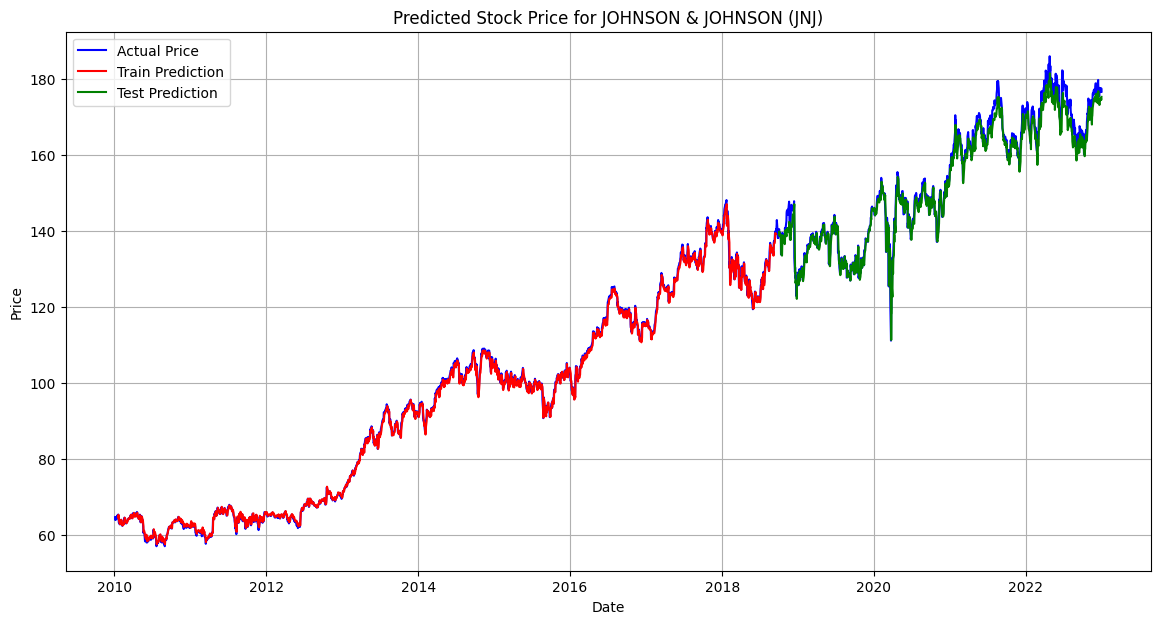

In [314]:
plot_multivar_predictions(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    df=df,
    lookback=lookback,
    train_size=train_size,
    scaler=target_scaler,
    permno=permno
)

The LSTM model with multiple variables shows similar RMSE values but slightly underperforms on test data. The plot indicates that while the model captures the overall trend, it struggles more with aligning actual prices, especially during price spikes and drops, compared to the single-variable model. The additional variables might be adding noise rather than improving predictive accuracy.

There is a trade-off between model complexity and predictive accuracy. More data can enhance understanding, but it can also mask critical patterns and lead to less reliable predictions if the additional variables are not directly influential. Simply adding more features without adjusting the model architecture may not improve predictions. Therefore, we will explore modifications in the model's architecture by varying the number of LSTM layers and the size of the hidden units.

## <a id='toc8_6_'></a>[Exploring Model Depth and Hidden Layer Size](#toc0_)
We’ll now investigate how changes in LSTM parameters, specifically the number of layers and the size of hidden units, affect our model’s performance. We aim at reaching an optimal setup that balances complexity and accuracy in our predictions.

### <a id='toc8_6_1_'></a>[2 Layers, 50 Hidden Units](#toc0_)

Epoch 0: Train RMSE 0.0407, Test RMSE 0.0756
Epoch 20: Train RMSE 0.0195, Test RMSE 0.0306
Epoch 40: Train RMSE 0.0101, Test RMSE 0.0317
Epoch 60: Train RMSE 0.0168, Test RMSE 0.0286

Early stopping triggered at epoch 79!
Training and validation complete.

Final evaluation metrics:
Train RMSE: 0.0100
Test RMSE: 0.0279


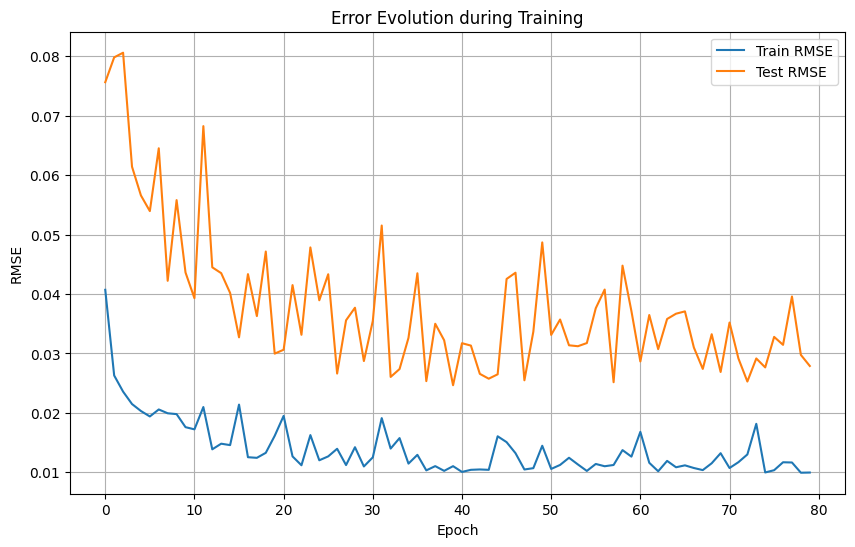

In [315]:
config_hyperparam = {
    'lr': 0.001,
    'batch_size': 32,
    'n_epochs': 500,
    'clip_value': 1.0,
}

input_size = X_train.shape[2]
model = MultivarLSTM(input_size=input_size, hidden_layer_size=50, num_layers=2)
optimizer = optim.Adam(model.parameters(), lr=config_hyperparam['lr']) 
loss_fn = nn.MSELoss()

train_and_validate(model, optimizer, loss_fn, X_train, y_train, X_test, y_test, config_hyperparam)

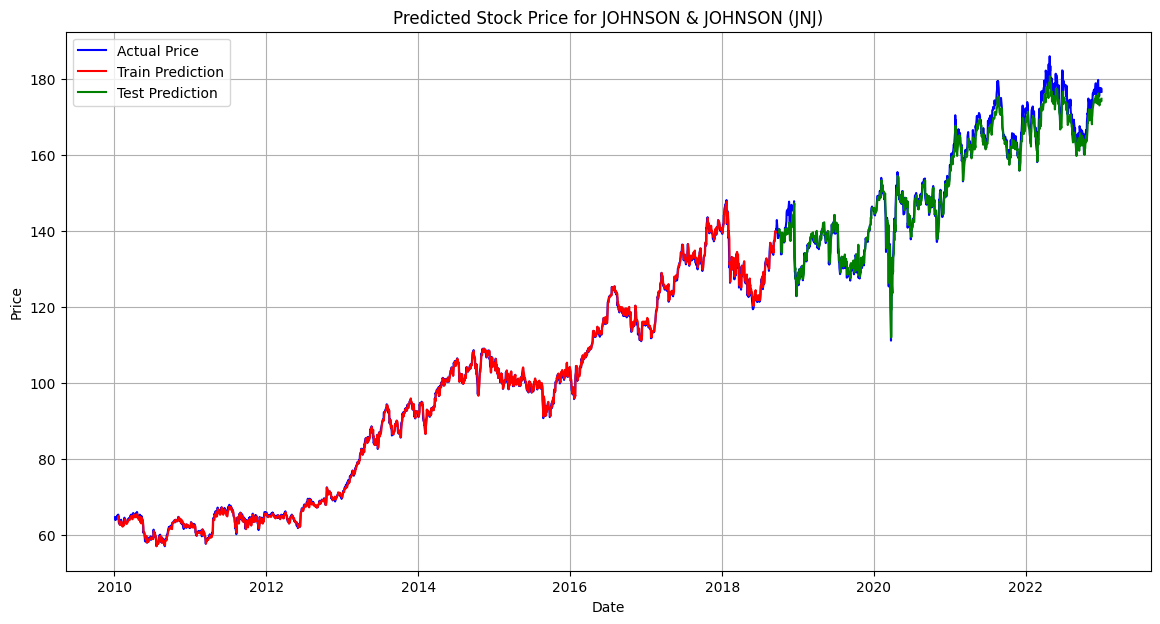

In [316]:
plot_multivar_predictions(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    df=df,
    lookback=lookback,
    train_size=train_size,
    scaler=target_scaler,
    permno=permno
)

### <a id='toc8_6_2_'></a>[3 Layers, 50 Hidden Units](#toc0_)

Epoch 0: Train RMSE 0.0415, Test RMSE 0.2302
Epoch 20: Train RMSE 0.0171, Test RMSE 0.0638
Epoch 40: Train RMSE 0.0106, Test RMSE 0.0328
Epoch 60: Train RMSE 0.0103, Test RMSE 0.0447
Epoch 80: Train RMSE 0.0128, Test RMSE 0.0291

Early stopping triggered at epoch 99!
Training and validation complete.

Final evaluation metrics:
Train RMSE: 0.0108
Test RMSE: 0.0408


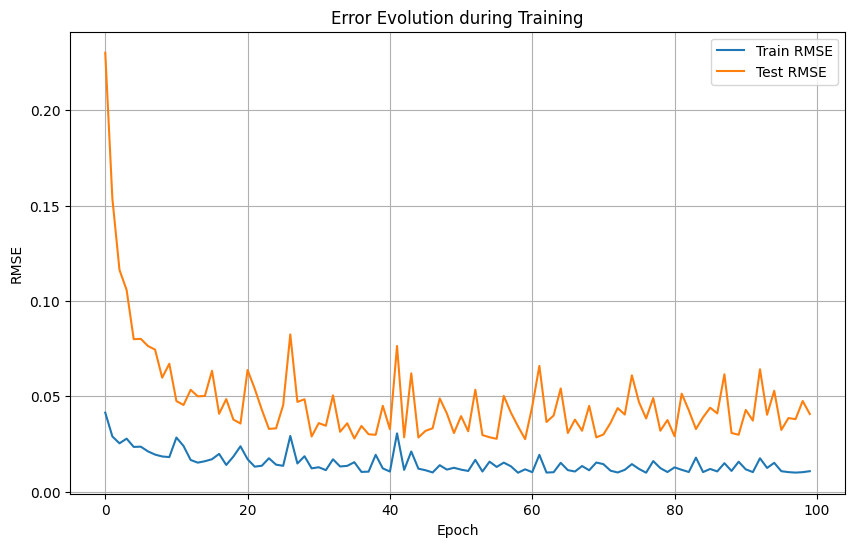

In [317]:
config_hyperparam = {
    'lr': 0.001,
    'batch_size': 32,
    'n_epochs': 500,
    'clip_value': 1.0,
}

input_size = X_train.shape[2]
model = MultivarLSTM(input_size=input_size, hidden_layer_size=50, num_layers=3)
optimizer = optim.Adam(model.parameters(), lr=config_hyperparam['lr']) 
loss_fn = nn.MSELoss()

train_and_validate(model, optimizer, loss_fn, X_train, y_train, X_test, y_test, config_hyperparam)

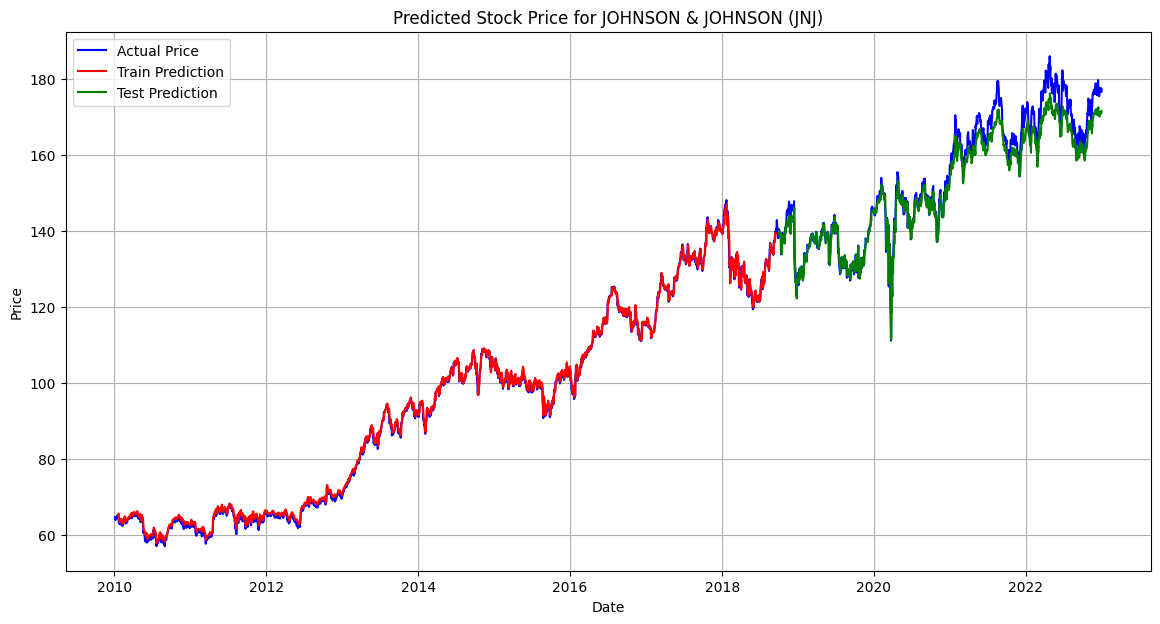

In [318]:
plot_multivar_predictions(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    df=df,
    lookback=lookback,
    train_size=train_size,
    scaler=target_scaler,
    permno=permno
)

### <a id='toc8_6_3_'></a>[1 Layer, 100 Hidden Units](#toc0_)

Epoch 0: Train RMSE 0.0290, Test RMSE 0.0791
Epoch 20: Train RMSE 0.0115, Test RMSE 0.0239
Epoch 40: Train RMSE 0.0111, Test RMSE 0.0240
Epoch 60: Train RMSE 0.0117, Test RMSE 0.0276
Epoch 80: Train RMSE 0.0150, Test RMSE 0.0366

Early stopping triggered at epoch 94!
Training and validation complete.

Final evaluation metrics:
Train RMSE: 0.0104
Test RMSE: 0.0232


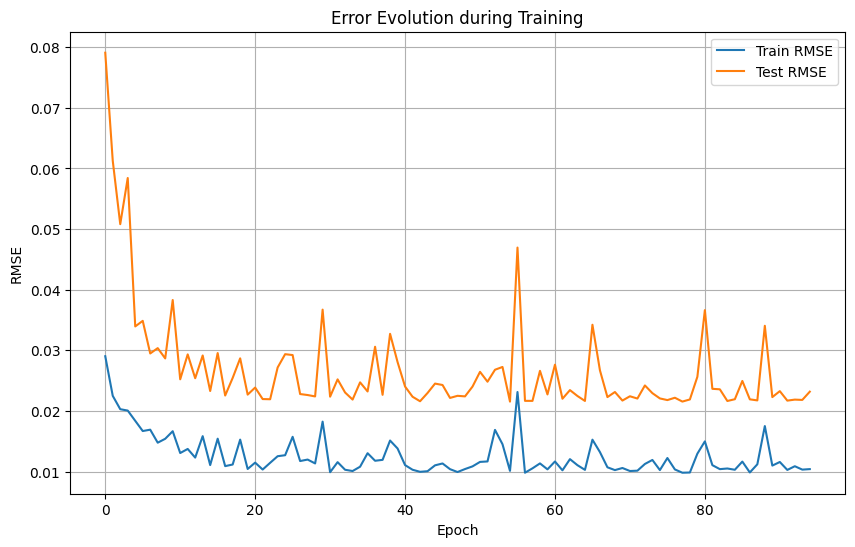

In [319]:
config_hyperparam = {
    'lr': 0.001,
    'batch_size': 32,
    'n_epochs': 500,
    'clip_value': 1.0,
}

input_size = X_train.shape[2]
model = MultivarLSTM(input_size=input_size, hidden_layer_size=100, num_layers=1)
optimizer = optim.Adam(model.parameters(), lr=config_hyperparam['lr']) 
loss_fn = nn.MSELoss()

train_and_validate(model, optimizer, loss_fn, X_train, y_train, X_test, y_test, config_hyperparam)

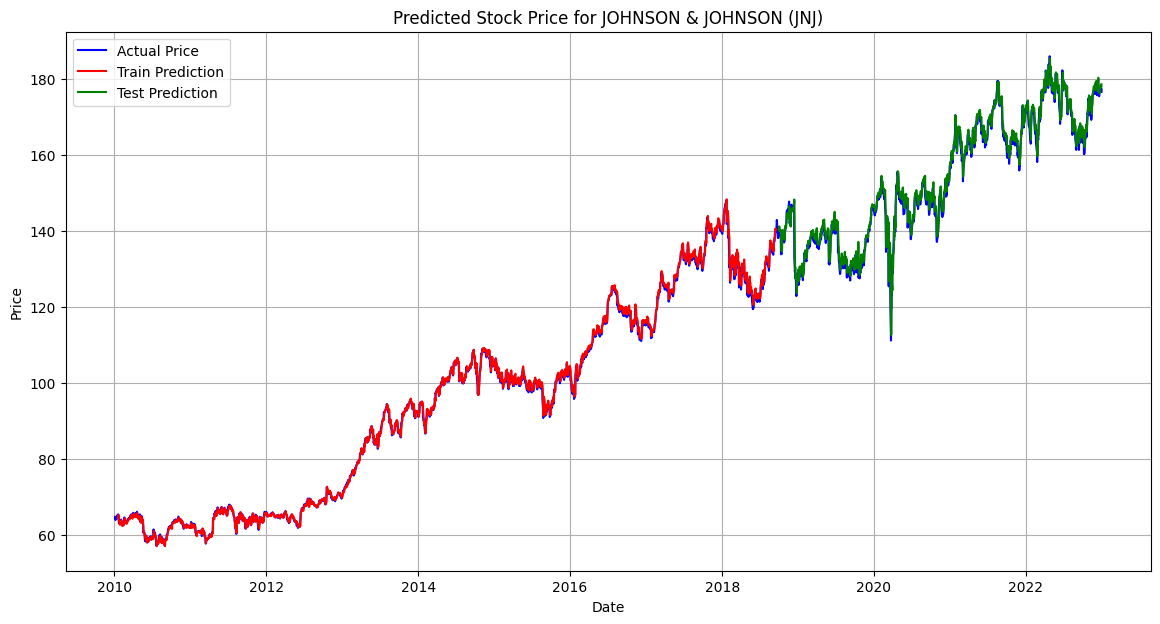

In [320]:
plot_multivar_predictions(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    df=df,
    lookback=lookback,
    train_size=train_size,
    scaler=target_scaler,
    permno=permno
)

### <a id='toc8_6_4_'></a>[1 Layer, 150 Hidden Units](#toc0_)

Epoch 0: Train RMSE 0.0355, Test RMSE 0.0613
Epoch 20: Train RMSE 0.0125, Test RMSE 0.0311
Epoch 40: Train RMSE 0.0124, Test RMSE 0.0229
Epoch 60: Train RMSE 0.0167, Test RMSE 0.0508

Early stopping triggered at epoch 78!
Training and validation complete.

Final evaluation metrics:
Train RMSE: 0.0144
Test RMSE: 0.0260


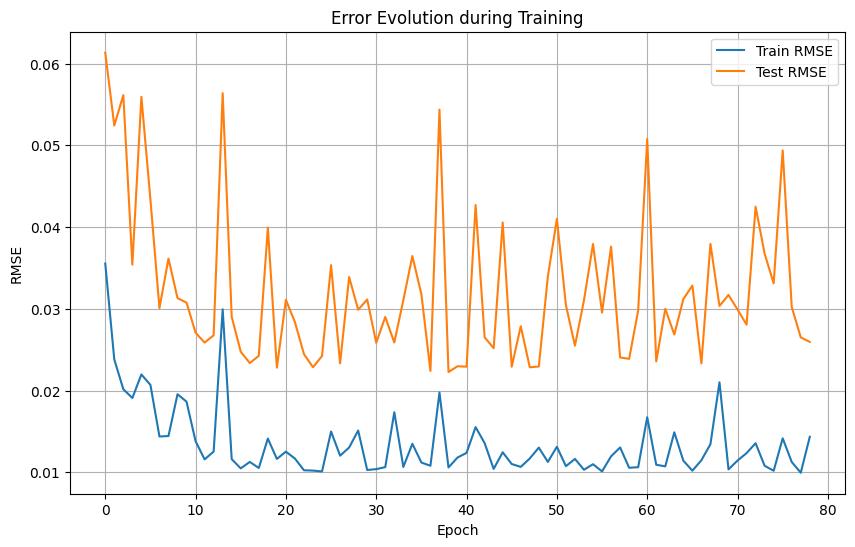

In [321]:
config_hyperparam = {
    'lr': 0.001,
    'batch_size': 32,
    'n_epochs': 500,
    'clip_value': 1.0,
}

input_size = X_train.shape[2]
model = MultivarLSTM(input_size=input_size, hidden_layer_size=150, num_layers=2)
optimizer = optim.Adam(model.parameters(), lr=config_hyperparam['lr']) 
loss_fn = nn.MSELoss()

train_and_validate(model, optimizer, loss_fn, X_train, y_train, X_test, y_test, config_hyperparam)

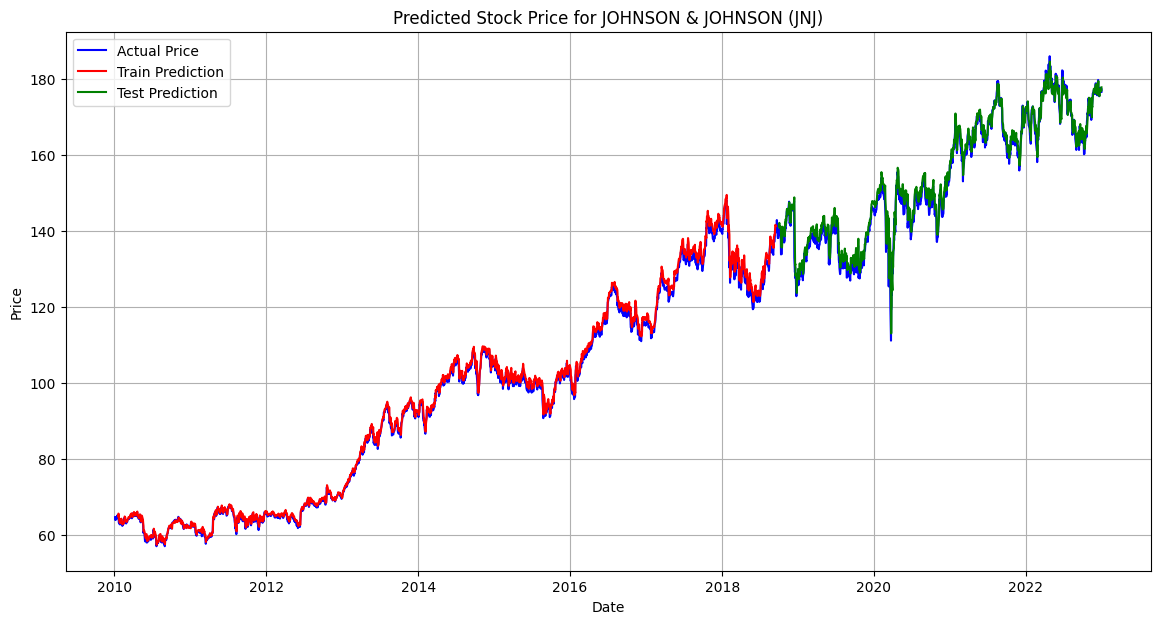

In [322]:
plot_multivar_predictions(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    df=df,
    lookback=lookback,
    train_size=train_size,
    scaler=target_scaler,
    permno=permno
)

- **Depth of Model**: Increasing the number of LSTM layers from one to two yields marginally better performance in terms of final RMSE. However, the two-layer model shows greater instability during the initial epochs, with more fluctuations in the test RMSE. Implementing three LSTM layers further increased the model's complexity, which maintained a very low training RMSE by capturing more patterns in the data. Still, this led to overfitting, with a much higher initial test RMSE and more variability during training. While additional layers can capture more complex patterns, they also require careful tuning to ensure stable convergence and to avoid overfitting.

- **Hidden Layer Size**: Increasing the hidden units to 100 resulted in more stable test RMSE and lower prediction errors, despite some increased noise in the training RMSE. This indicates improved generalization and more accurate predictions. Further increasing the hidden units to 150 led to high variability in both train and test RMSE, with extreme fluctuations throughout training. Early stopping helped mitigate some of these effects, but the results clearly show the need to balance model complexity. While more hidden units can improve pattern recognition, excessively large sizes can cause instability and limit performance.

## <a id='toc8_7_'></a>[Testing on Other Assets](#toc0_)

We will apply our optimized LSTM model to extreme cases, specifically stocks with the highest and lowest prices and volumes (on average). This will help understanding the model's robustness and its performance on assets with different market characteristics.

In [343]:
def plot_stock_price(ax, permno, df, crsp_d):
    company_name = crsp_d.loc[crsp_d['permno'] == permno, 'comnam'].iloc[0]
    ticker = crsp_d.loc[crsp_d['permno'] == permno, 'ticker'].iloc[0]
    df_subset = df.loc[df['permno'] == permno]

    ax.plot(df_subset['date'], df_subset['prc'], label='Actual Price', color='blue')
    ax.set_title(f'{company_name} ({ticker})')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.grid(True)
    ax.legend()

def plot_trading_volume(ax, permno, df, crsp_d):
    company_name = crsp_d.loc[crsp_d['permno'] == permno, 'comnam'].iloc[0]
    ticker = crsp_d.loc[crsp_d['permno'] == permno, 'ticker'].iloc[0]
    df_subset = df.loc[df['permno'] == permno]

    ax.plot(df_subset['date'], df_subset['vol'], label='Trading Volume', color='green')
    ax.set_title(f'Trading Volume for {company_name} ({ticker})')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    ax.grid(True)
    ax.legend()

In [344]:
# Find assets with the highest and lowest average prices and volumes
average_prices = comp2.groupby('permno')['prc'].mean()
average_volumes = comp2.groupby('permno')['vol'].mean()

highest_avg_price_permno = average_prices.idxmax()
lowest_avg_price_permno = average_prices.idxmin()
highest_avg_volume_permno = average_volumes.idxmax()
lowest_avg_volume_permno = average_volumes.idxmin()

# Printing asset details
print("Stock with the highest average price:", crsp_d.loc[crsp_d['permno'] == highest_avg_price_permno, 'comnam'].values[0], 
      'Ticker:', crsp_d.loc[crsp_d['permno'] == highest_avg_price_permno, 'ticker'].values[0])
print("Stock with the lowest average price:", crsp_d.loc[crsp_d['permno'] == lowest_avg_price_permno, 'comnam'].values[0], 
      'Ticker:', crsp_d.loc[crsp_d['permno'] == lowest_avg_price_permno, 'ticker'].values[0])
print("Stock with the highest average volume:", crsp_d.loc[crsp_d['permno'] == highest_avg_volume_permno, 'comnam'].values[0], 
      'Ticker:', crsp_d.loc[crsp_d['permno'] == highest_avg_volume_permno, 'ticker'].values[0])
print("Stock with the lowest average volume:", crsp_d.loc[crsp_d['permno'] == lowest_avg_volume_permno, 'comnam'].values[0], 
      'Ticker:', crsp_d.loc[crsp_d['permno'] == lowest_avg_volume_permno, 'ticker'].values[0])

Stock with the highest average price: N V R INC Ticker: NVR
Stock with the lowest average price: SPRINT NEXTEL CORP Ticker: S
Stock with the highest average volume: BANK OF AMERICA CORP Ticker: BAC
Stock with the lowest average volume: N V R INC Ticker: NVR


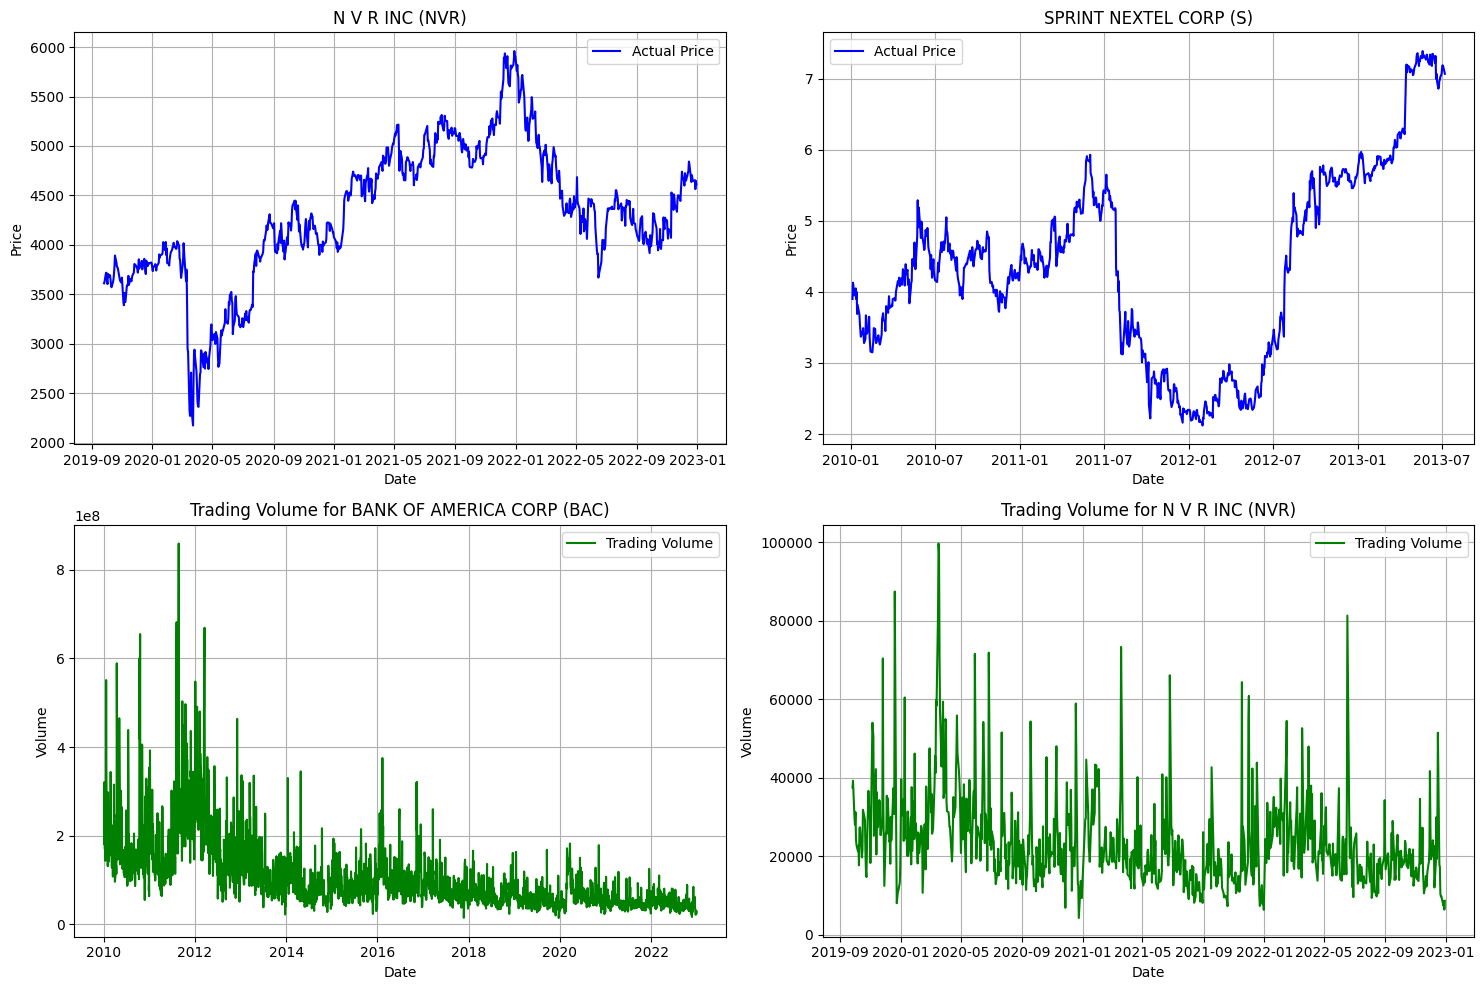

In [345]:
# Plotting for each case
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plot_stock_price(axs[0, 0], highest_avg_price_permno, comp2, crsp_d)
plot_stock_price(axs[0, 1], lowest_avg_price_permno, comp2, crsp_d)
plot_trading_volume(axs[1, 0], highest_avg_volume_permno, comp2, crsp_d)
plot_trading_volume(axs[1, 1], lowest_avg_volume_permno, comp2, crsp_d)
plt.tight_layout()
plt.show()

### <a id='toc8_7_1_'></a>[Highest Price and Lowest Trading Volume Stock (NVR)](#toc0_)

In [346]:
df_high_p = comp2.loc[comp2['permno'] == highest_avg_price_permno]

features = df_high_p[input_cols].values.astype('float32')
target = df_high_p[[target_col]].values.astype('float32')

# Initialize separate scalers for features and target
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Split data into training and test sets before scaling
train_size = int(len(features) * 0.67)
features_train, features_test = features[:train_size], features[train_size:]
target_train, target_test = target[:train_size], target[train_size:]

# Scale features and target separately
features_train_scaled = feature_scaler.fit_transform(features_train)
features_test_scaled = feature_scaler.transform(features_test)
target_train_scaled = target_scaler.fit_transform(target_train)
target_test_scaled = target_scaler.transform(target_test)

X_train, y_train = create_dataset(features_train_scaled, target_train_scaled, lookback=lookback)
X_test, y_test = create_dataset(features_test_scaled, target_test_scaled, lookback=lookback)

print("Train data shapes:", X_train.shape, y_train.shape)
print("Test data shapes:", X_test.shape, y_test.shape)

Train data shapes: torch.Size([541, 10, 18]) torch.Size([541, 1])
Test data shapes: torch.Size([262, 10, 18]) torch.Size([262, 1])


Epoch 0: Train RMSE 0.2329, Test RMSE 0.3396
Epoch 20: Train RMSE 0.0447, Test RMSE 0.0487
Epoch 40: Train RMSE 0.0369, Test RMSE 0.0384
Epoch 60: Train RMSE 0.0318, Test RMSE 0.0396
Epoch 80: Train RMSE 0.0335, Test RMSE 0.0373

Early stopping triggered at epoch 91!
Training and validation complete.

Final evaluation metrics:
Train RMSE: 0.0297
Test RMSE: 0.0431


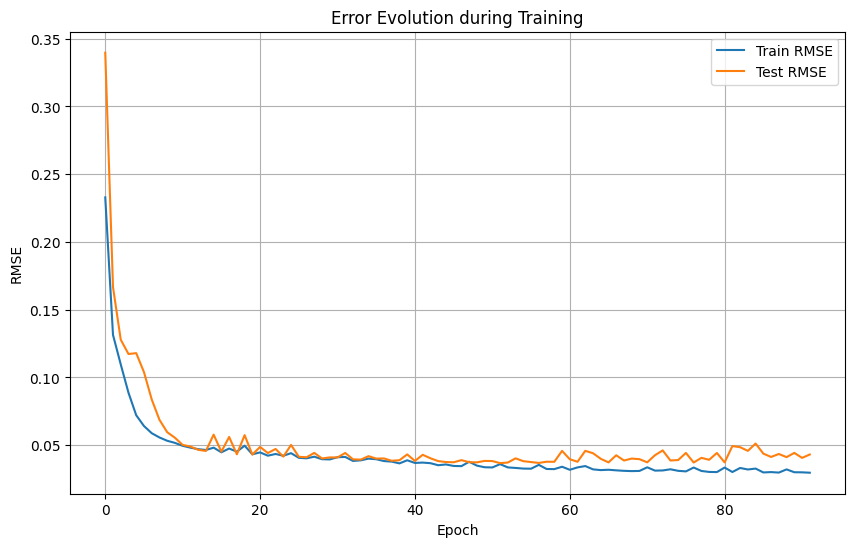

In [347]:
config_hyperparam = {
    'lr': 0.001,
    'batch_size': 32,
    'n_epochs': 500,
    'clip_value': 1.0,
}

input_size = X_train.shape[2]
model = MultivarLSTM(input_size=input_size, hidden_layer_size=50, num_layers=1)
optimizer = optim.Adam(model.parameters(), lr=config_hyperparam['lr']) 
loss_fn = nn.MSELoss()

train_and_validate(model, optimizer, loss_fn, X_train, y_train, X_test, y_test, config_hyperparam)

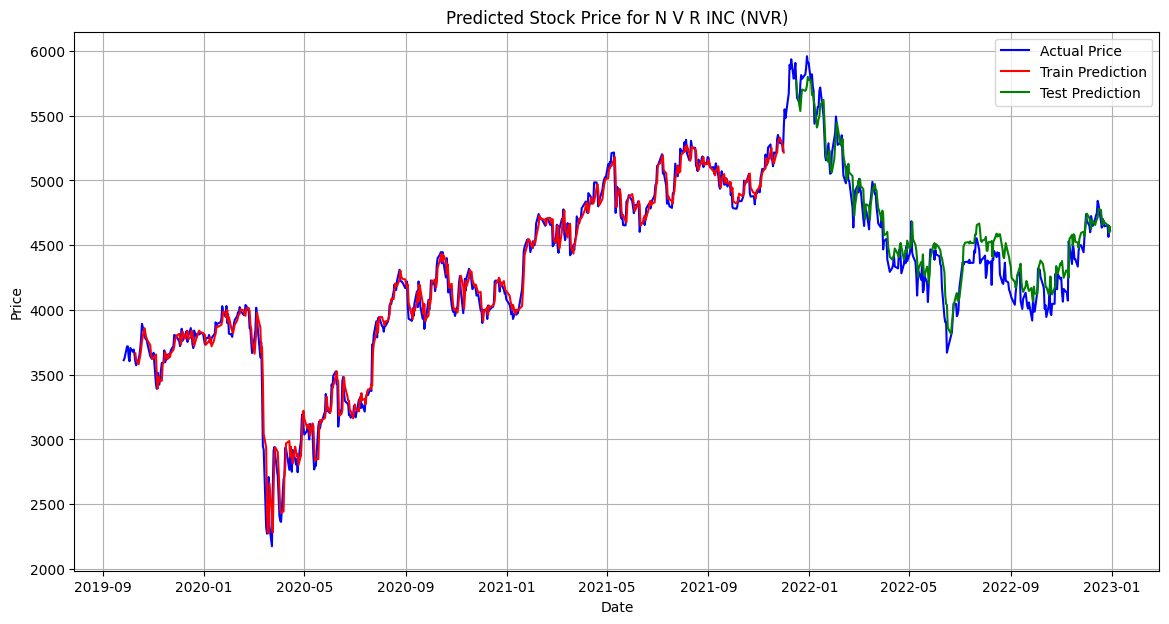

In [348]:
plot_multivar_predictions(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    df=df_high_p,
    lookback=lookback,
    train_size=train_size,
    scaler=target_scaler,
    permno=highest_avg_price_permno
)

- **RMSE Trends**: Training and testing RMSE values were close throughout the epochs, starting high and stabilizing around 0.03 to 0.04.
- **Prediction Accuracy**: Model predictions for NVR stock were fairly accurate, effectively capturing overall trends despite not being perfectly precise in every instance.
- **Analysis Period**: The slight prediction errors were expected due to the analysis period extending a bit over three years.

### <a id='toc8_7_2_'></a>[Lowest Price Stock (S)](#toc0_)

In [349]:
df_low_p = comp2.loc[comp2['permno'] == lowest_avg_price_permno]

features = df_low_p[input_cols].values.astype('float32')
target = df_low_p[[target_col]].values.astype('float32')

# Initialize separate scalers for features and target
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Split data into training and test sets before scaling
train_size = int(len(features) * 0.67)
features_train, features_test = features[:train_size], features[train_size:]
target_train, target_test = target[:train_size], target[train_size:]

# Scale features and target separately
features_train_scaled = feature_scaler.fit_transform(features_train)
features_test_scaled = feature_scaler.transform(features_test)
target_train_scaled = target_scaler.fit_transform(target_train)
target_test_scaled = target_scaler.transform(target_test)

X_train, y_train = create_dataset(features_train_scaled, target_train_scaled, lookback=lookback)
X_test, y_test = create_dataset(features_test_scaled, target_test_scaled, lookback=lookback)

print("Train data shapes:", X_train.shape, y_train.shape)
print("Test data shapes:", X_test.shape, y_test.shape)

Train data shapes: torch.Size([581, 10, 18]) torch.Size([581, 1])
Test data shapes: torch.Size([282, 10, 18]) torch.Size([282, 1])


Epoch 0: Train RMSE 0.2736, Test RMSE 0.5690
Epoch 20: Train RMSE 0.0431, Test RMSE 0.0985
Epoch 40: Train RMSE 0.0350, Test RMSE 0.0899
Epoch 60: Train RMSE 0.0332, Test RMSE 0.0907
Epoch 80: Train RMSE 0.0325, Test RMSE 0.0923

Early stopping triggered at epoch 97!
Training and validation complete.

Final evaluation metrics:
Train RMSE: 0.0341
Test RMSE: 0.0788


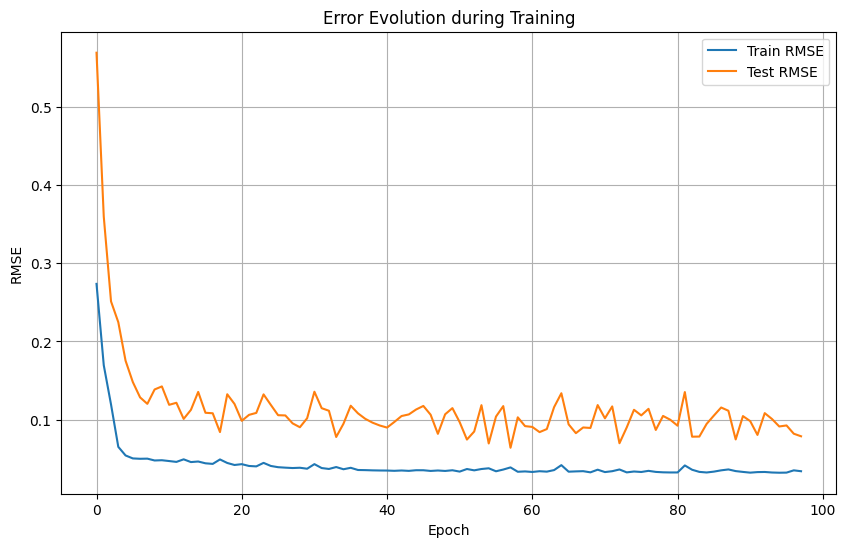

In [350]:
config_hyperparam = {
    'lr': 0.001,
    'batch_size': 32,
    'n_epochs': 500,
    'clip_value': 1.0,
}

input_size = X_train.shape[2]
model = MultivarLSTM(input_size=input_size, hidden_layer_size=50, num_layers=1)
optimizer = optim.Adam(model.parameters(), lr=config_hyperparam['lr']) 
loss_fn = nn.MSELoss()

train_and_validate(model, optimizer, loss_fn, X_train, y_train, X_test, y_test, config_hyperparam)

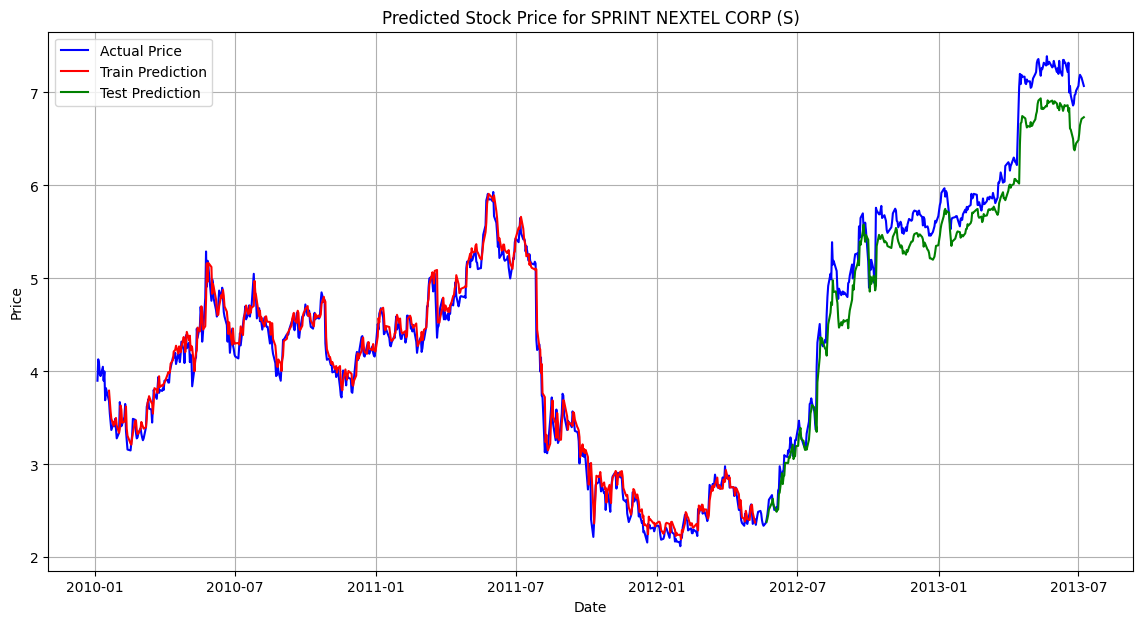

In [351]:
plot_multivar_predictions(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    df=df_low_p,
    lookback=lookback,
    train_size=train_size,
    scaler=target_scaler,
    permno=lowest_avg_price_permno
)

- **RMSE Trends**: Test RMSE was higher than train RMSE, stabilizing around 0.1 after an initial decrease from 0.5.
- **Prediction Accuracy**: Model consistently captured the overall trend, with a tendency to slightly undervalue the asset in the test set.
- **Impact of Price Scale**: Given the lower scale of prices, prediction inaccuracies had a relatively minor impact, making the model's performance more acceptable in practical terms.

### <a id='toc8_7_3_'></a>[Highest Trading Volume Stock (BAC)](#toc0_)

In [352]:
df_high_v = comp2.loc[comp2['permno'] == highest_avg_volume_permno]

features = df_high_v[input_cols].values.astype('float32')
target = df_high_v[[target_col]].values.astype('float32')

# Initialize separate scalers for features and target
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

# Split data into training and test sets before scaling
train_size = int(len(features) * 0.67)
features_train, features_test = features[:train_size], features[train_size:]
target_train, target_test = target[:train_size], target[train_size:]

# Scale features and target separately
features_train_scaled = feature_scaler.fit_transform(features_train)
features_test_scaled = feature_scaler.transform(features_test)
target_train_scaled = target_scaler.fit_transform(target_train)
target_test_scaled = target_scaler.transform(target_test)

X_train, y_train = create_dataset(features_train_scaled, target_train_scaled, lookback=lookback)
X_test, y_test = create_dataset(features_test_scaled, target_test_scaled, lookback=lookback)

print("Train data shapes:", X_train.shape, y_train.shape)
print("Test data shapes:", X_test.shape, y_test.shape)

Train data shapes: torch.Size([2182, 10, 18]) torch.Size([2182, 1])
Test data shapes: torch.Size([1070, 10, 18]) torch.Size([1070, 1])


Epoch 0: Train RMSE 0.0582, Test RMSE 0.0706
Epoch 20: Train RMSE 0.0136, Test RMSE 0.0430
Epoch 40: Train RMSE 0.0112, Test RMSE 0.0457
Epoch 60: Train RMSE 0.0114, Test RMSE 0.0328
Epoch 80: Train RMSE 0.0109, Test RMSE 0.0373
Epoch 100: Train RMSE 0.0104, Test RMSE 0.0368
Epoch 120: Train RMSE 0.0123, Test RMSE 0.0307

Early stopping triggered at epoch 133!
Training and validation complete.

Final evaluation metrics:
Train RMSE: 0.0113
Test RMSE: 0.0401


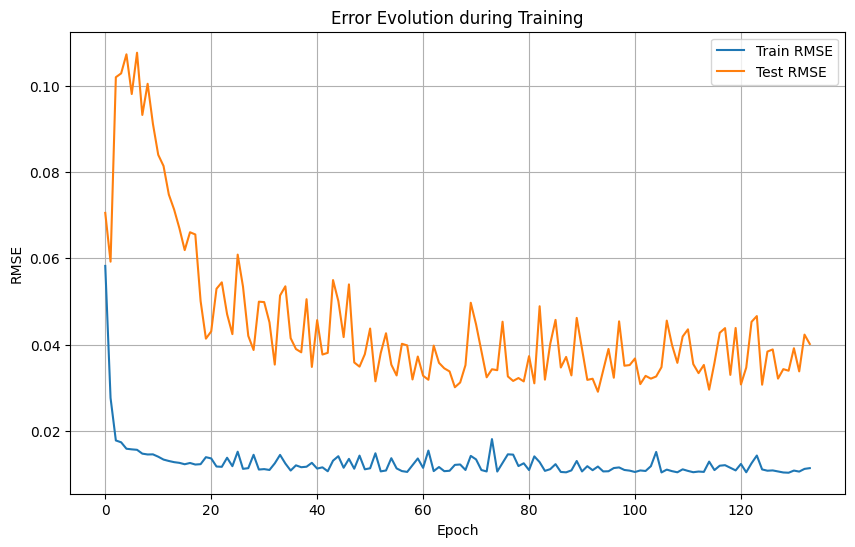

In [353]:
config_hyperparam = {
    'lr': 0.001,
    'batch_size': 32,
    'n_epochs': 500,
    'clip_value': 1.0,
}

input_size = X_train.shape[2]
model = MultivarLSTM(input_size=input_size, hidden_layer_size=50, num_layers=1)
optimizer = optim.Adam(model.parameters(), lr=config_hyperparam['lr']) 
loss_fn = nn.MSELoss()

train_and_validate(model, optimizer, loss_fn, X_train, y_train, X_test, y_test, config_hyperparam)

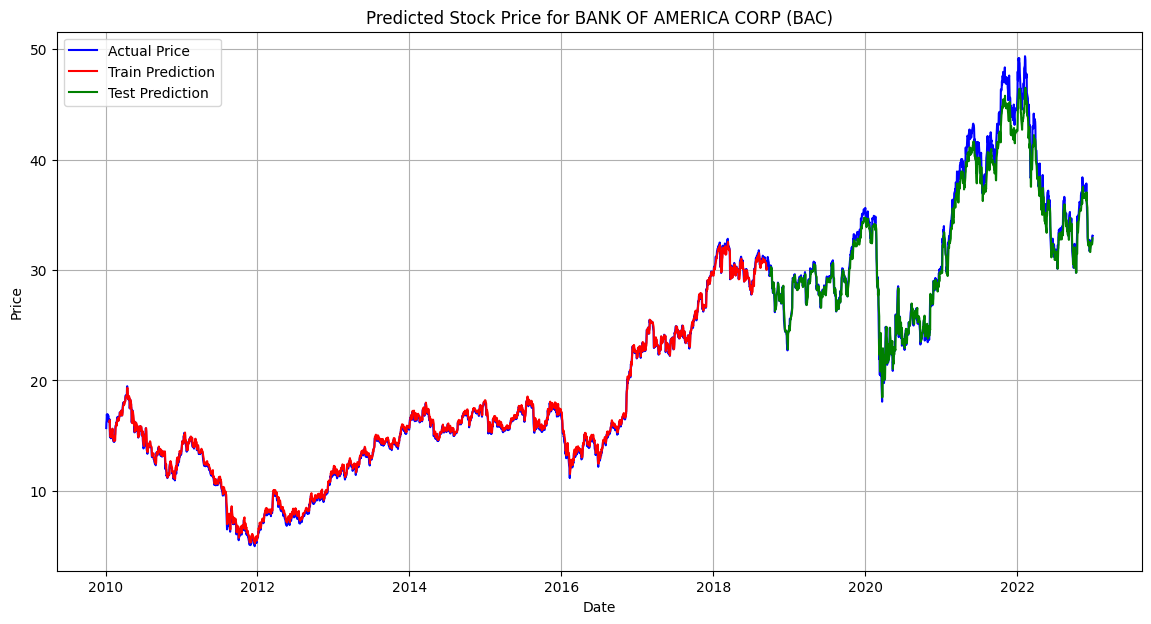

In [354]:
plot_multivar_predictions(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    df=df_high_v,
    lookback=lookback,
    train_size=train_size,
    scaler=target_scaler,
    permno=highest_avg_volume_permno
)

- **RMSE Trends**: Initially, the test RMSE increased but then decreased and reached stability, remaining higher than train RMSE but still quite low.
- **Prediction Accuracy**: High level of prediction accuracy due to the well-established and stable nature of Bank of America, as reflected in its consistently high trading volumes.
- **Analysis Period**: Continuous presence in the S\&P 500 index from 2010 to 2022 provided a larger time frame for training, enhancing model performance.

# <a id='toc9_'></a>[Summary of Findings](#toc0_)

**Univariate LSTM Model**
- **Approach**: Used historical stock prices to predict future prices.
- **Performance**: Showed significant improvements over linear regression with lower RMSE values and better trend prediction.
- **Training Dynamics**: Rapid decrease in error during initial epochs, stabilizing at low values, indicating effective learning of temporal dependencies.

**Enhanced Univariate LSTM Model**
- **Techniques**: Incorporated gradient clipping, increased batch size and early stopping.
- **Impact**: Stabilized training, improved convergence and prevented overfitting.
- **Performance**: Showed robust performance with stable and low RMSE values.

**Multivariate LSTM Model**
- **Approach**: Included additional variables like trading volume and financial ratios.
- **Performance**: Showed initial improvements in RMSE but introduced more noise, leading to greater fluctuations in test RMSE.
- **Trade-off**: Clear understanding of market behavior but challenges in balancing complexity and stability.

**LSTM Model with Varying Depth**
- **Two Layers**: Similar final RMSE values to the single-layer model but more fluctuations during training.
- **Three Layers**: Significant overfitting, with high initial test RMSE that decreased over time but remained higher than simpler models.

**LSTM Model with Varying Hidden Layer Size**
- **100 Units**: Similar performance to the 50-unit model but with more stability in test RMSE.
- **150 Units**: Introduced significant variability, indicating challenges in balancing complexity and stability.

**Extreme Market Conditions**
- **NVR (Highest Price, Lowest Volume)**: Model captured overall trend but had some prediction inaccuracies due to limited data period.
- **Sprint Nextel (Lowest Price)**: Model accurately captured price trends despite slightly undervaluing the asset in the test set.
- **Bank of America (Highest Volume)**: Model showed outstanding performance with stable and low RMSE, reflecting the stock's stability and high trading volume.

**Overall Findings**
- **LSTM Models**: With the right enhancements and multivariate inputs, LSTM models significantly improve stock price predictions over traditional methods.
- **Model Tuning**: Fine-tuning models and including multiple variables are crucial for capturing complex market behaviors but come with challenges related to overfitting and data variability.
- **Implications**: These results provide a solid foundation for further research and practical applications in financial modeling and investment strategies.